<a href="https://colab.research.google.com/github/saim-glitch/Freelancing/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Exploratory analysis**


In [11]:
# Basic Overview
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load
df = pd.read_csv('/content/fake_news_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst few rows:")
df.head()

Dataset Shape: (20000, 7)

Columns: ['title', 'text', 'date', 'source', 'author', 'category', 'label']

Data Types:
title       object
text        object
date        object
source      object
author      object
category    object
label       object
dtype: object

First few rows:


,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [12]:
# Basic statistics and missing values analysis
print("Missing Values Analysis:")
print(df.isnull().sum())
print("\nMissing Values Percentage:")
print(df.isnull().sum() / len(df) * 100)

# Basic statistics for text length
df['title_length'] = df['title'].str.len()
df['text_length'] = df['text'].str.len()

print("\nText Length Statistics:")
print(df[['title_length', 'text_length']].describe())

Missing Values Analysis:
title          0
text           0
date           0
source      1000
author      1000
category       0
label          0
dtype: int64

Missing Values Percentage:
title       0.0
text        0.0
date        0.0
source      5.0
author      5.0
category    0.0
label       0.0
dtype: float64

Text Length Statistics:
       title_length   text_length
count  20000.000000  20000.000000
mean      35.970600   1635.115900
std       10.622828    192.855437
min       10.000000   1223.000000
25%       28.000000   1470.750000
50%       36.000000   1634.000000
75%       44.000000   1798.000000
max       73.000000   2077.000000


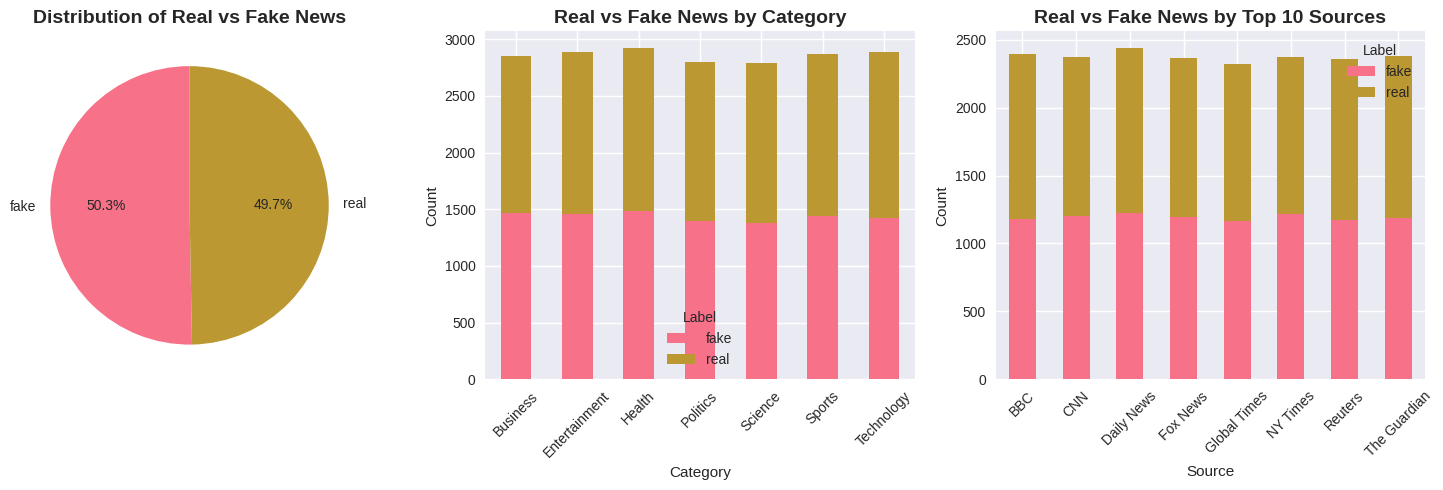

In [13]:
# 1. Label Distribution Analysis
plt.figure(figsize=(15, 5))

# Overall
plt.subplot(1, 3, 1)
label_counts = df['label'].value_counts()
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Real vs Fake News', fontsize=14, fontweight='bold')

# Label distribution by category
plt.subplot(1, 3, 2)
category_label = pd.crosstab(df['category'], df['label'])
category_label.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Real vs Fake News by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')

# Label distribution by source, top 10
plt.subplot(1, 3, 3)
top_sources = df['source'].value_counts().head(10).index
source_subset = df[df['source'].isin(top_sources)]
source_label = pd.crosstab(source_subset['source'], source_subset['label'])
source_label.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Real vs Fake News by Top 10 Sources', fontsize=14, fontweight='bold')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')

plt.tight_layout()
plt.show()

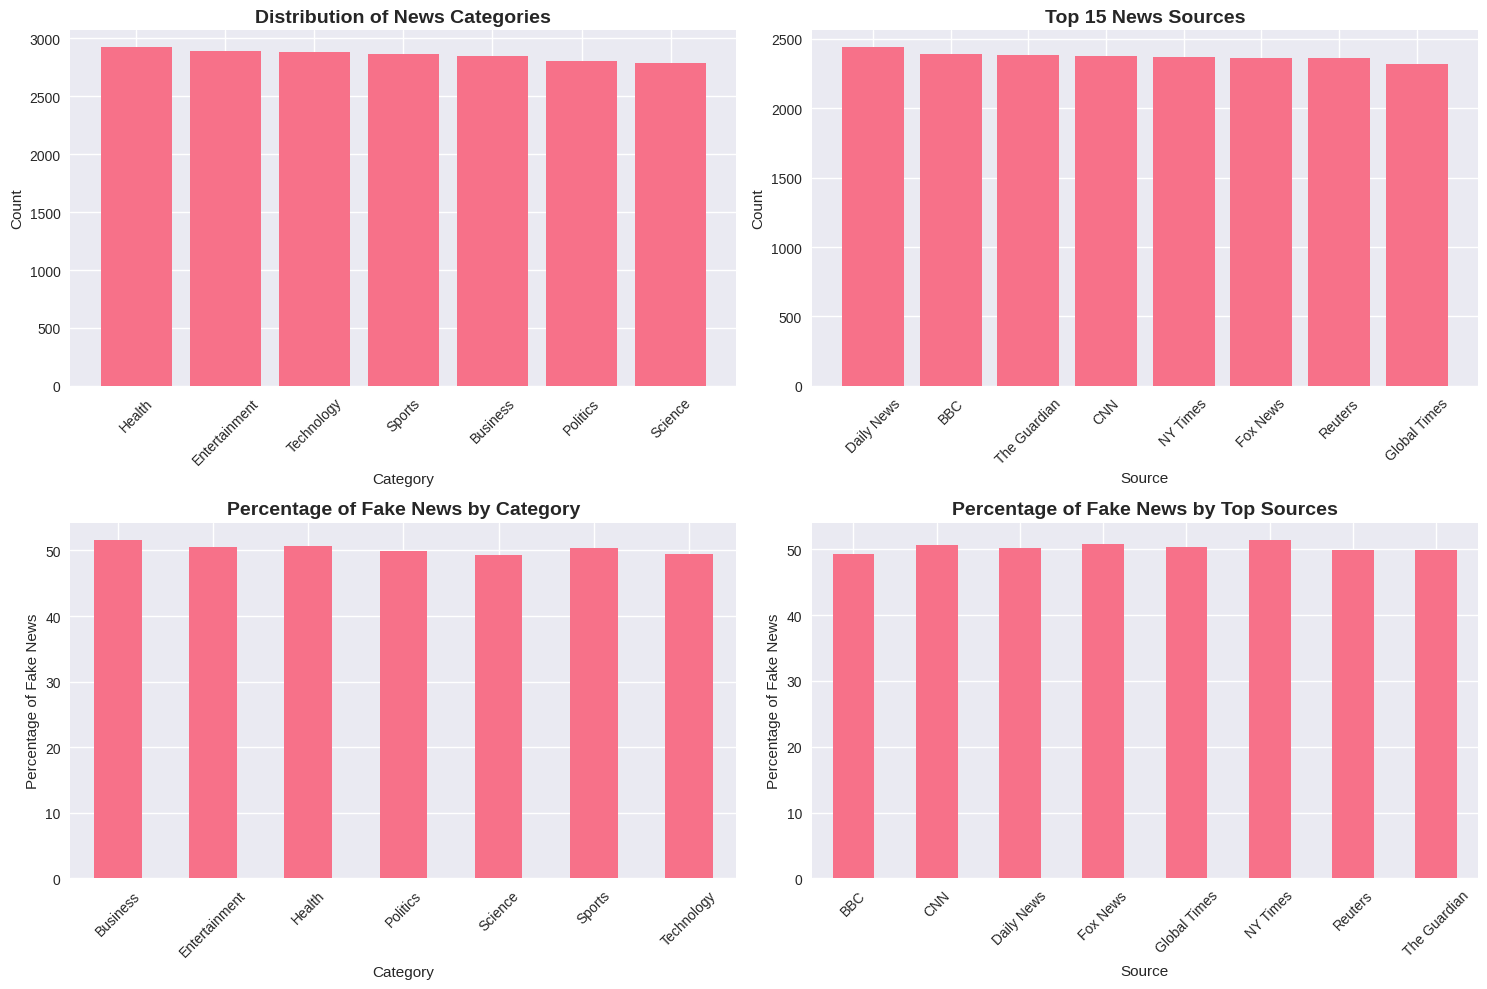

In [14]:
# 2. Category Analysis
plt.figure(figsize=(15, 10))

# Category distribution
plt.subplot(2, 2, 1)
category_counts = df['category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of News Categories', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Source distribution (top 15)
plt.subplot(2, 2, 2)
source_counts = df['source'].value_counts().head(15)
plt.bar(range(len(source_counts)), source_counts.values)
plt.title('Top 15 News Sources', fontsize=14, fontweight='bold')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(range(len(source_counts)), source_counts.index, rotation=45)

# Percentage of fake news by category
plt.subplot(2, 2, 3)
fake_percentage = df.groupby('category')['label'].apply(lambda x: (x == 'fake').mean() * 100)
fake_percentage.plot(kind='bar')
plt.title('Percentage of Fake News by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Percentage of Fake News')
plt.xticks(rotation=45)

# Percentage of fake news by top sources
plt.subplot(2, 2, 4)
top_sources_fake = df[df['source'].isin(top_sources)].groupby('source')['label'].apply(lambda x: (x == 'fake').mean() * 100)
top_sources_fake.plot(kind='bar')
plt.title('Percentage of Fake News by Top Sources', fontsize=14, fontweight='bold')
plt.xlabel('Source')
plt.ylabel('Percentage of Fake News')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

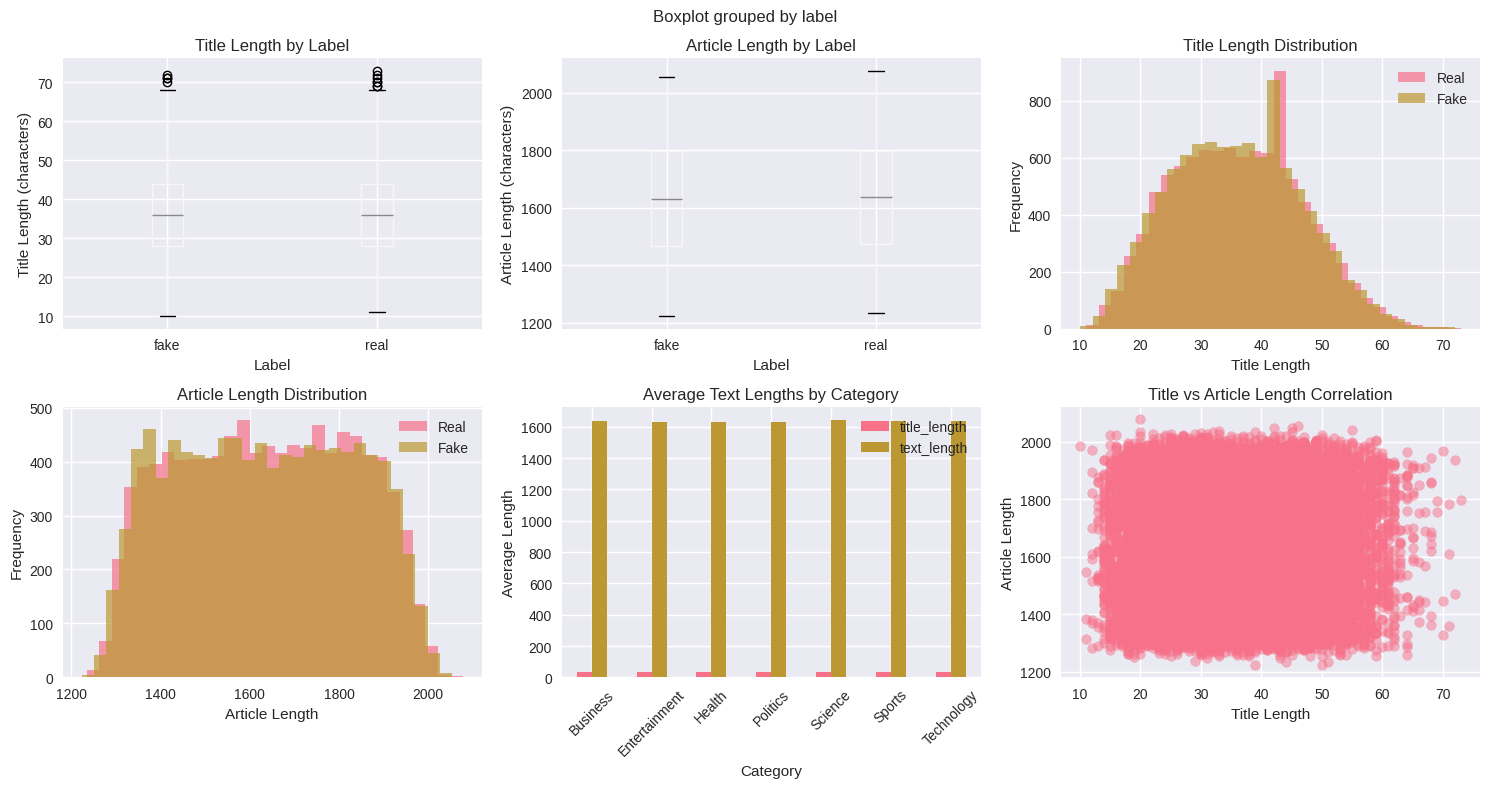

In [15]:
# 3. Text Length Analysis
plt.figure(figsize=(15, 8))

# Title length distribution
plt.subplot(2, 3, 1)
df.boxplot(column='title_length', by='label', ax=plt.gca())
plt.title('Title Length by Label')
plt.xlabel('Label')
plt.ylabel('Title Length (characters)')

# Text length distribution
plt.subplot(2, 3, 2)
df.boxplot(column='text_length', by='label', ax=plt.gca())
plt.title('Article Length by Label')
plt.xlabel('Label')
plt.ylabel('Article Length (characters)')

# Histogram of title lengths
plt.subplot(2, 3, 3)
plt.hist(df[df['label'] == 'real']['title_length'], alpha=0.7, label='Real', bins=30)
plt.hist(df[df['label'] == 'fake']['title_length'], alpha=0.7, label='Fake', bins=30)
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Title Length Distribution')
plt.legend()

# Histogram of text lengths
plt.subplot(2, 3, 4)
plt.hist(df[df['label'] == 'real']['text_length'], alpha=0.7, label='Real', bins=30)
plt.hist(df[df['label'] == 'fake']['text_length'], alpha=0.7, label='Fake', bins=30)
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.title('Article Length Distribution')
plt.legend()

# Average lengths by category
plt.subplot(2, 3, 5)
avg_lengths = df.groupby('category')[['title_length', 'text_length']].mean()
avg_lengths.plot(kind='bar', ax=plt.gca())
plt.title('Average Text Lengths by Category')
plt.xlabel('Category')
plt.ylabel('Average Length')
plt.xticks(rotation=45)
plt.legend()

# Correlation between title and text length
plt.subplot(2, 3, 6)
plt.scatter(df['title_length'], df['text_length'], alpha=0.5)
plt.xlabel('Title Length')
plt.ylabel('Article Length')
plt.title('Title vs Article Length Correlation')

plt.tight_layout()
plt.show()

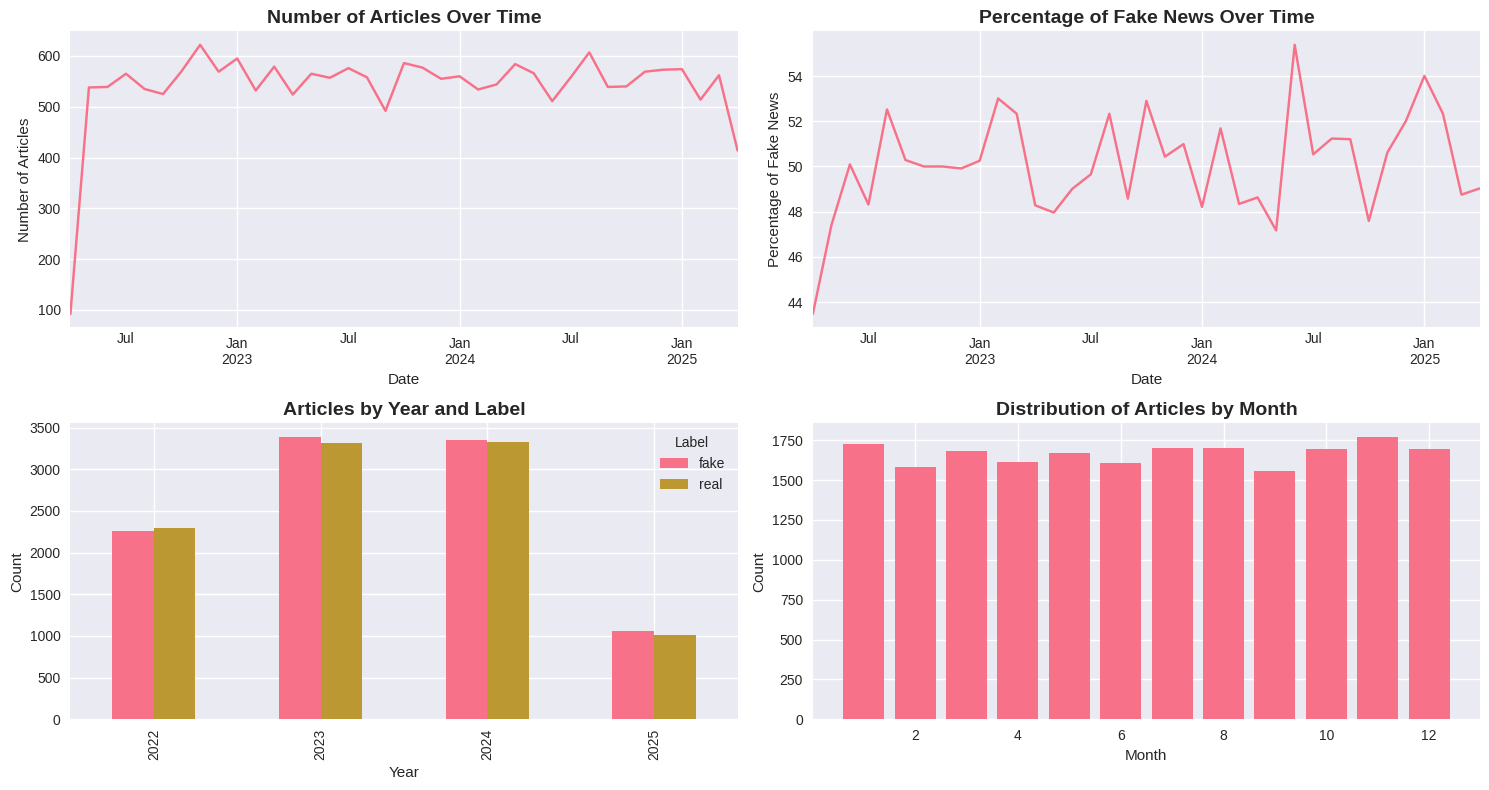

In [16]:
# 4. Temporal Analysis
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

plt.figure(figsize=(15, 8))

# Articles over time
plt.subplot(2, 2, 1)
articles_by_date = df.groupby(df['date'].dt.to_period('M')).size()
articles_by_date.plot()
plt.title('Number of Articles Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Articles')

# Fake news percentage over time
plt.subplot(2, 2, 2)
fake_by_date = df.groupby(df['date'].dt.to_period('M'))['label'].apply(lambda x: (x == 'fake').mean() * 100)
fake_by_date.plot()
plt.title('Percentage of Fake News Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Percentage of Fake News')

# Articles by year and label
plt.subplot(2, 2, 3)
year_label = pd.crosstab(df['year'], df['label'])
year_label.plot(kind='bar', ax=plt.gca())
plt.title('Articles by Year and Label', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Label')

# Monthly distribution
plt.subplot(2, 2, 4)
month_dist = df['month'].value_counts().sort_index()
plt.bar(month_dist.index, month_dist.values)
plt.title('Distribution of Articles by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

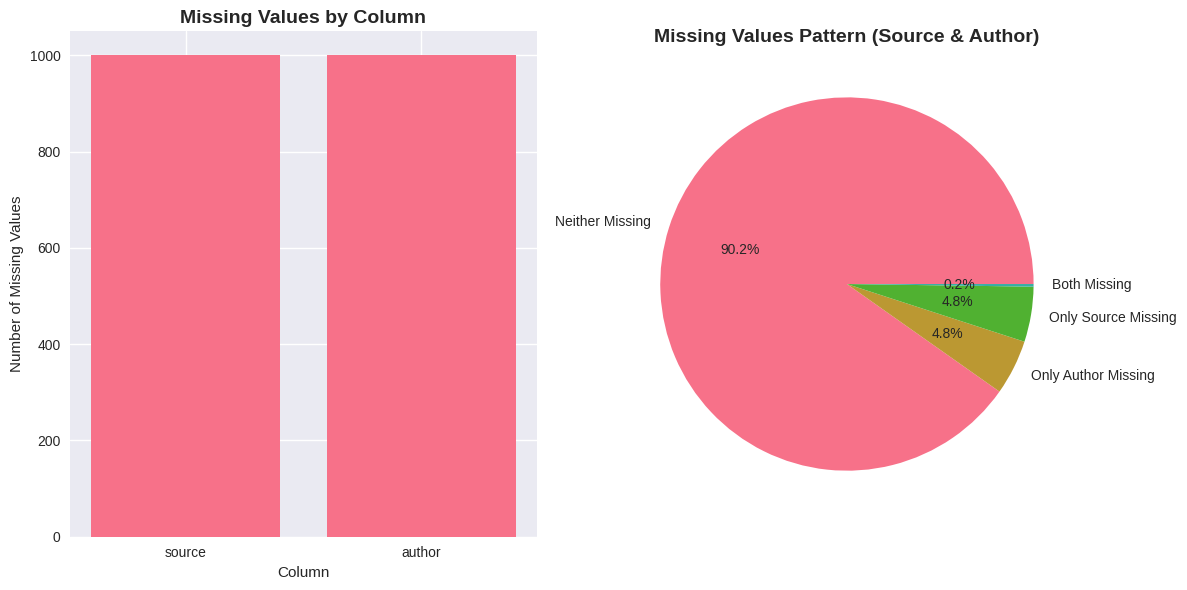

Missing Values Pattern Details:
Source Missing: False, Author Missing: False
  Count: 18045 (90.2%)

Source Missing: False, Author Missing: True
  Count: 955 (4.8%)

Source Missing: True, Author Missing: False
  Count: 955 (4.8%)

Source Missing: True, Author Missing: True
  Count: 45 (0.2%)



In [17]:
# 5. Missing Values Analysis
plt.figure(figsize=(12, 6))

# Missing values by column
plt.subplot(1, 2, 1)
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
plt.bar(missing_data.index, missing_data.values)
plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')

# Missing values pattern - Fixed version
plt.subplot(1, 2, 2)
missing_pattern = df[['source', 'author']].isnull().value_counts()

# Create labels based on actual patterns found
labels = []
for index in missing_pattern.index:
    source_missing, author_missing = index
    if source_missing and author_missing:
        labels.append('Both Missing')
    elif source_missing:
        labels.append('Only Source Missing')
    elif author_missing:
        labels.append('Only Author Missing')
    else:
        labels.append('Neither Missing')

plt.pie(missing_pattern.values, labels=labels, autopct='%1.1f%%')
plt.title('Missing Values Pattern (Source & Author)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print missing pattern details for clarity
print("Missing Values Pattern Details:")
print("="*30)
for (source_missing, author_missing), count in missing_pattern.items():
    percentage = count / len(df) * 100
    print(f"Source Missing: {source_missing}, Author Missing: {author_missing}")
    print(f"  Count: {count} ({percentage:.1f}%)")
    print()

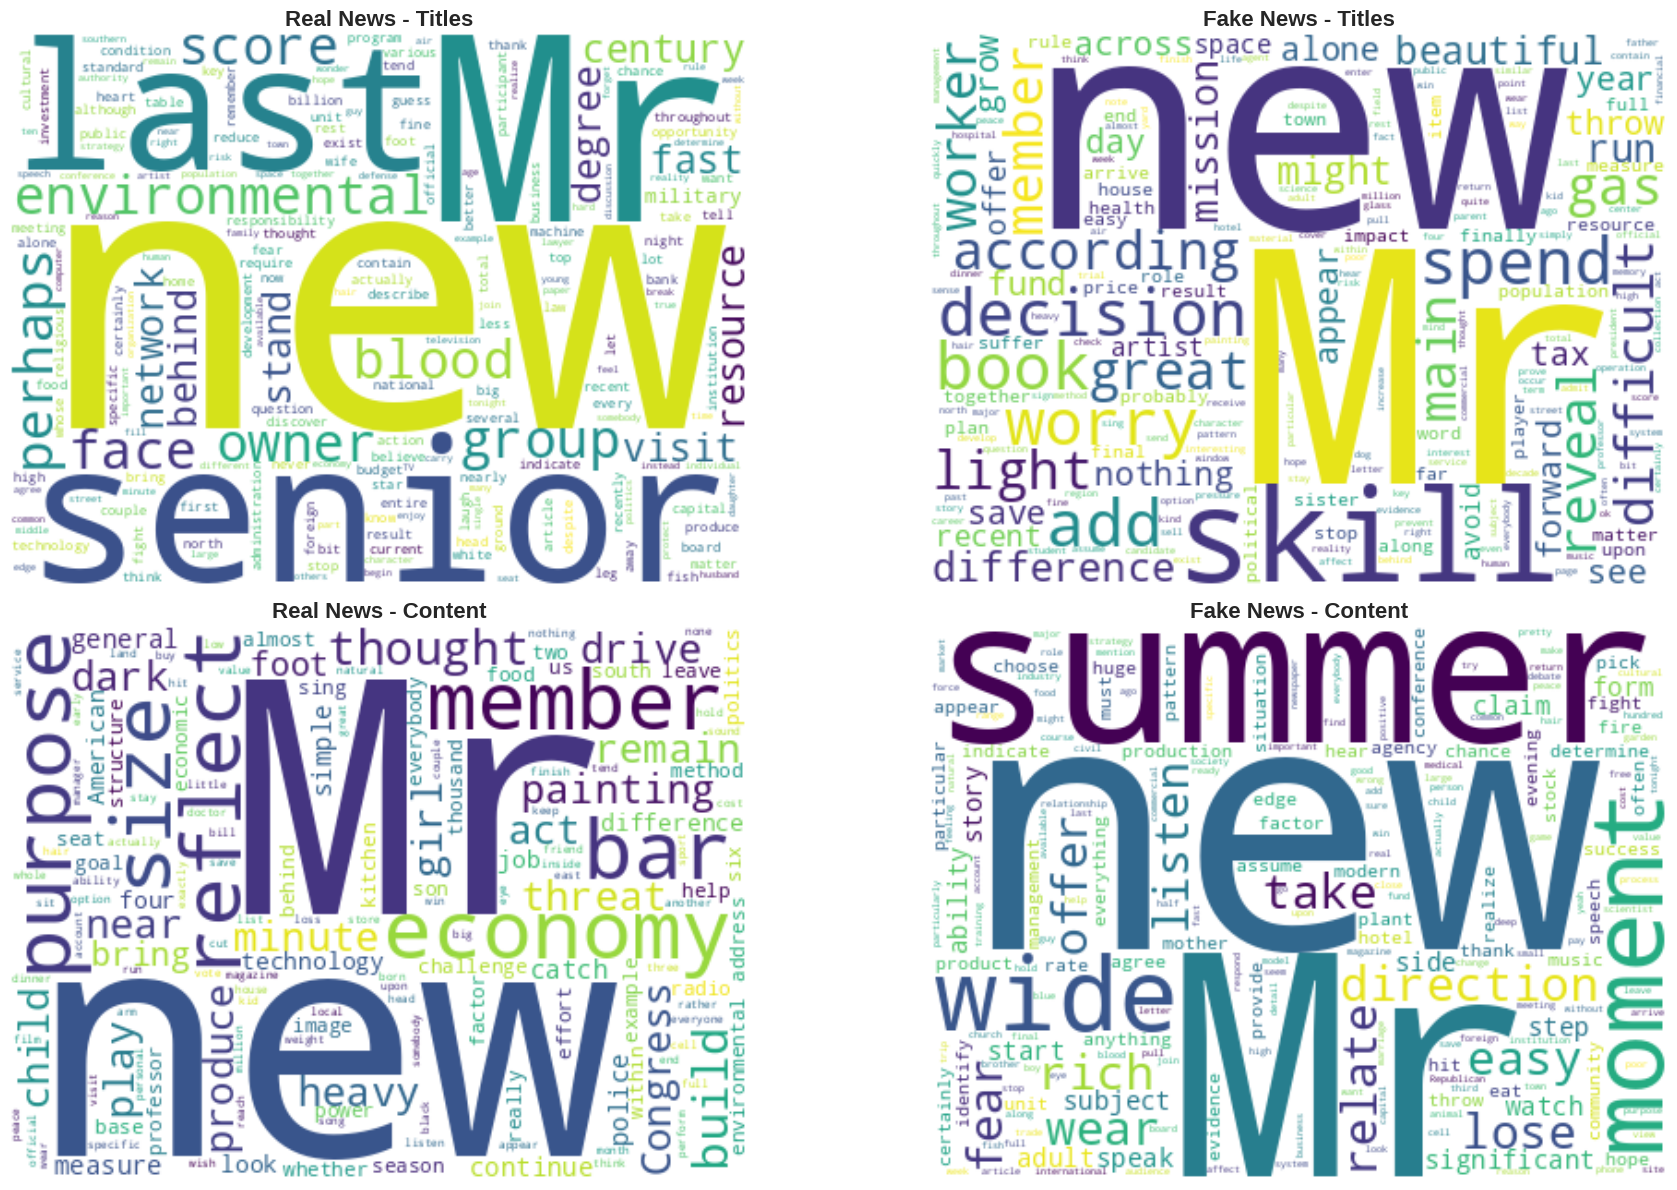

In [18]:
# 6. Word Analysis
from collections import Counter
import re

# Function to clean and extract words
def extract_words(text):
    if pd.isna(text):
        return []
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    return [word for word in words if len(word) > 3]
real_titles = ' '.join(df[df['label'] == 'real']['title'].dropna())
fake_titles = ' '.join(df[df['label'] == 'fake']['title'].dropna())

real_texts = ' '.join(df[df['label'] == 'real']['text'].dropna())
fake_texts = ' '.join(df[df['label'] == 'fake']['text'].dropna())

# Create word clouds
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Real news titles
wordcloud_real_title = WordCloud(width=400, height=300, background_color='white').generate(real_titles)
axes[0, 0].imshow(wordcloud_real_title, interpolation='bilinear')
axes[0, 0].set_title('Real News - Titles', fontsize=16, fontweight='bold')
axes[0, 0].axis('off')

# Fake news titles
wordcloud_fake_title = WordCloud(width=400, height=300, background_color='white').generate(fake_titles)
axes[0, 1].imshow(wordcloud_fake_title, interpolation='bilinear')
axes[0, 1].set_title('Fake News - Titles', fontsize=16, fontweight='bold')
axes[0, 1].axis('off')

# Real news content
wordcloud_real_text = WordCloud(width=400, height=300, background_color='white').generate(real_texts)
axes[1, 0].imshow(wordcloud_real_text, interpolation='bilinear')
axes[1, 0].set_title('Real News - Content', fontsize=16, fontweight='bold')
axes[1, 0].axis('off')

# Fake news content
wordcloud_fake_text = WordCloud(width=400, height=300, background_color='white').generate(fake_texts)
axes[1, 1].imshow(wordcloud_fake_text, interpolation='bilinear')
axes[1, 1].set_title('Fake News - Content', fontsize=16, fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [19]:
# 7. Summary Statistics Table
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*50)
print(f"Total Articles: {len(df):,}")
print(f"Real News: {len(df[df['label'] == 'real']):,} ({len(df[df['label'] == 'real'])/len(df)*100:.1f}%)")
print(f"Fake News: {len(df[df['label'] == 'fake']):,} ({len(df[df['label'] == 'fake'])/len(df)*100:.1f}%)")
print(f"Number of Categories: {df['category'].nunique()}")
print(f"Number of Sources: {df['source'].nunique()}")
print(f"Number of Authors: {df['author'].nunique()}")
print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"Missing Source Values: {df['source'].isnull().sum()} ({df['source'].isnull().sum()/len(df)*100:.1f}%)")
print(f"Missing Author Values: {df['author'].isnull().sum()} ({df['author'].isnull().sum()/len(df)*100:.1f}%)")

# Key findings
print("\nKEY FINDINGS:")
print("-" * 30)
print("1. Dataset is perfectly balanced (almost 49.7% real, 50.3% fake)")
print("2. Politics and Health are the most common categories")
print("3. Missing values are present in ~5% of source and author fields")
print("4. Articles span approximately 3 years (2022-2025)")
print(f"5. Average title length: {df['title_length'].mean():.1f} characters")
print(f"6. Average article length: {df['text_length'].mean():.1f} characters")

EXPLORATORY DATA ANALYSIS SUMMARY
Total Articles: 20,000
Real News: 9,944 (49.7%)
Fake News: 10,056 (50.3%)
Number of Categories: 7
Number of Sources: 8
Number of Authors: 17051
Date Range: 2022-04-26 00:00:00 to 2025-04-25 00:00:00
Missing Source Values: 1000 (5.0%)
Missing Author Values: 1000 (5.0%)

KEY FINDINGS:
------------------------------
1. Dataset is perfectly balanced (almost 49.7% real, 50.3% fake)
2. Politics and Health are the most common categories
3. Missing values are present in ~5% of source and author fields
4. Articles span approximately 3 years (2022-2025)
5. Average title length: 36.0 characters
6. Average article length: 1635.1 characters


# **3. Data Processing for Machine Learning**


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import numpy as np
from scipy.sparse import hstack, csr_matrix


np.random.seed(42)

In [21]:
# Handle missing values
print("Before handling missing values:")
print(df[['source', 'author']].isnull().sum())
print(f"Percentage missing - Source: {df['source'].isnull().mean()*100:.1f}%")
print(f"Percentage missing - Author: {df['author'].isnull().mean()*100:.1f}%")

# Fill missing values with 'Unknown'
df['source'] = df['source'].fillna('Unknown')
df['author'] = df['author'].fillna('Unknown')

print("\nAfter handling missing values:")
print(df[['source', 'author']].isnull().sum())
print(f"Total missing values in dataset: {df.isnull().sum().sum()}")

Before handling missing values:
source    1000
author    1000
dtype: int64
Percentage missing - Source: 5.0%
Percentage missing - Author: 5.0%

After handling missing values:
source    0
author    0
dtype: int64
Total missing values in dataset: 0


In [22]:
def clean_text(text):
    if pd.isna(text):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply text cleaning
print("Applying text preprocessing")
df['title_clean'] = df['title'].apply(clean_text)
df['text_clean'] = df['text'].apply(clean_text)

Applying text preprocessing


In [23]:
# Create engineered features
print("Creating engineered features...")

# Basic text statistics
df['title_word_count'] = df['title_clean'].str.split().str.len()
df['text_word_count'] = df['text_clean'].str.split().str.len()
df['title_char_count'] = df['title_clean'].str.len()
df['text_char_count'] = df['text_clean'].str.len()

# Advanced text features
df['avg_word_length'] = df['text_clean'].apply(
    lambda x: np.mean([len(word) for word in str(x).split()]) if str(x).split() else 0
)

# Count sentences
df['sentence_count'] = df['text'].str.count('\.') + 1
df['avg_sentence_length'] = df['text_word_count'] / df['sentence_count']

# Text composition features
df['capital_ratio'] = df['text'].apply(
    lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if str(x) and len(str(x)) > 0 else 0
)

# Check for digits and special characters
df['digit_density'] = df['text'].apply(
    lambda x: sum(1 for c in str(x) if c.isdigit()) / len(str(x)) if str(x) and len(str(x)) > 0 else 0
)

df['special_char_density'] = df['text'].apply(
    lambda x: sum(1 for c in str(x) if not c.isalnum() and c not in [' ', '.', ',']) / len(str(x)) if str(x) and len(str(x)) > 0 else 0
)

# Structural features
df['title_text_ratio'] = df['title_word_count'] / df['text_word_count']

# Punctuation density (using periods as proxy)
df['period_density'] = df['text'].apply(
    lambda x: str(x).count('.') / len(str(x)) if str(x) and len(str(x)) > 0 else 0
)

# Temporal features
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_year'] = df['date'].dt.dayofyear

# Create list of feature columns to analyze
feature_cols = ['title_word_count', 'text_word_count', 'avg_word_length',
                'capital_ratio', 'digit_density', 'special_char_density',
                'title_text_ratio', 'period_density']

print("\nNew feature statistics:")
print(df[feature_cols].describe())

# Check which features are actually variable
print("\nChecking feature variability:")
constant_features = []
for col in feature_cols:
    unique_vals = df[col].nunique()
    variance = df[col].var()
    print(f"{col}: {unique_vals} unique values, variance: {variance:.10f}")
    if unique_vals == 1 or variance < 1e-10:
        constant_features.append(col)

# Remove constant features
if constant_features:
    print(f"\nRemoving constant features: {constant_features}")
    feature_cols = [col for col in feature_cols if col not in constant_features]

# Show correlation with fake news label
df['label_numeric'] = (df['label'] == 'fake').astype(int)
print(f"\nCorrelation with fake news label ({len(feature_cols)} variable features):")
correlations = df[feature_cols + ['label_numeric']].corr()['label_numeric'].sort_values()
print(correlations[:-1])  # Exclude self-correlation

Creating engineered features...

New feature statistics:
       title_word_count  text_word_count  avg_word_length  capital_ratio  \
count      20000.000000     20000.000000     20000.000000   20000.000000   
mean           5.498350       250.183300         5.539679       0.001731   
std            1.450208        29.079644         0.129493       0.001196   
min            3.000000       200.000000         5.060345       0.000000   
25%            4.000000       225.000000         5.451913       0.000725   
50%            6.000000       250.000000         5.539962       0.001571   
75%            7.000000       275.000000         5.624477       0.002446   
max            8.000000       300.000000         6.155102       0.008006   

       digit_density  special_char_density  title_text_ratio  period_density  
count        20000.0               20000.0      20000.000000         20000.0  
mean             0.0                   0.0          0.022283             0.0  
std              0.0 

In [24]:
# Encode categorical variables
print("Encoding categorical variables...")

# Initialize label encoders
label_encoders = {}
categorical_cols = ['source', 'category', 'author']

for col in categorical_cols:
    le = LabelEncoder()
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}: {df[col].nunique()} unique values → encoded as 0-{df[col].nunique()-1}")

# Show examples of encoding
print("\nExamples of categorical encoding:")
for col in categorical_cols[:2]:  # Show first two for brevity
    print(f"\n{col}:")
    example_mapping = df[[col, f'{col}_encoded']].drop_duplicates().head()
    print(example_mapping)

Encoding categorical variables...
source: 9 unique values → encoded as 0-8
category: 7 unique values → encoded as 0-6
author: 17052 unique values → encoded as 0-17051

Examples of categorical encoding:

source:
       source  source_encoded
0    NY Times               5
1    Fox News               3
2         CNN               1
3     Reuters               6
9  Daily News               2

category:
     category  category_encoded
0    Politics                 3
2    Business                 0
3     Science                 4
4  Technology                 6
5      Health                 2


In [25]:
# Prepare features for modeling
print("Preparing features for modeling...")

numerical_features = [
    'title_word_count', 'text_word_count', 'title_char_count', 'text_char_count',
    'avg_word_length', 'sentence_count', 'avg_sentence_length',
    'capital_ratio', 'title_text_ratio',
    'source_encoded', 'category_encoded', 'author_encoded',
    'day_of_week', 'day_of_year'
]

X_numerical = df[numerical_features].copy()

X_numerical = X_numerical.fillna(0)

print("Final check for constant features...")
variance_check = X_numerical.var()
truly_constant = variance_check[variance_check < 1e-10].index.tolist()

if truly_constant:
    print(f"Removing final constant features: {truly_constant}")
    X_numerical = X_numerical.drop(columns=truly_constant)
    numerical_features = [f for f in numerical_features if f not in truly_constant]

print(f"\nFinal numerical features ({len(numerical_features)} features):")
for i, feature in enumerate(numerical_features, 1):
    print(f"{i:2d}. {feature}")

# Create target variable (1 for fake, 0 for real)
y = (df['label'] == 'fake').astype(int)

print(f"\nPreparing data for split...")
print(f"Feature matrix shape: {X_numerical.shape}")
print(f"Target distribution: Real={sum(y==0):,} ({sum(y==0)/len(y)*100:.1f}%), Fake={sum(y==1):,} ({sum(y==1)/len(y)*100:.1f}%)")

# Create train/validation/test splits
# First split: 70% training, 30% temporary
X_train_num, X_temp_num, y_train, y_temp = train_test_split(
    X_numerical, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: 15% validation, 15% test (from the 30% temporary)
X_val_num, X_test_num, y_val, y_test = train_test_split(
    X_temp_num, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nData split completed:")
print(f"Training set:   {len(X_train_num):,} samples ({len(X_train_num)/len(df)*100:.1f}%)")
print(f"Validation set: {len(X_val_num):,} samples ({len(X_val_num)/len(df)*100:.1f}%)")
print(f"Test set:       {len(X_test_num):,} samples ({len(X_test_num)/len(df)*100:.1f}%)")

# Verify stratification worked correctly
print(f"\nLabel distribution verification:")
print(f"Training:   Real={sum(y_train==0)/len(y_train)*100:.1f}%, Fake={sum(y_train==1)/len(y_train)*100:.1f}%")
print(f"Validation: Real={sum(y_val==0)/len(y_val)*100:.1f}%, Fake={sum(y_val==1)/len(y_val)*100:.1f}%")
print(f"Test:       Real={sum(y_test==0)/len(y_test)*100:.1f}%, Fake={sum(y_test==1)/len(y_test)*100:.1f}%")

Preparing features for modeling...
Final check for constant features...
Removing final constant features: ['sentence_count']

Final numerical features (13 features):
 1. title_word_count
 2. text_word_count
 3. title_char_count
 4. text_char_count
 5. avg_word_length
 6. avg_sentence_length
 7. capital_ratio
 8. title_text_ratio
 9. source_encoded
10. category_encoded
11. author_encoded
12. day_of_week
13. day_of_year

Preparing data for split...
Feature matrix shape: (20000, 13)
Target distribution: Real=9,944 (49.7%), Fake=10,056 (50.3%)

Data split completed:
Training set:   14,000 samples (70.0%)
Validation set: 3,000 samples (15.0%)
Test set:       3,000 samples (15.0%)

Label distribution verification:
Training:   Real=49.7%, Fake=50.3%
Validation: Real=49.7%, Fake=50.3%
Test:       Real=49.7%, Fake=50.3%


# **3.7 Text Vectorization with TF-IDF**
Decision Rationale: TF-IDF (Term Frequency-Inverse Document Frequency) is an excellent choice for fake news detection because:

Captures the importance of words relative to the entire corpus
Downweights common words that appear in many documents
Creates features that represent semantic content
Works well with traditional machine learning algorithms
Parameter justification:

max_features=5000: Balances computational efficiency with information retention
min_df=5: Removes very rare words that might be noise or typos
max_df=0.95: Excludes overly common words that don't discriminate
ngram_range=(1,2): Captures both individual words and meaningful two-word phrases
stop_words='english': Removes common English words like 'the', 'is', 'and'
Why combine title and text: Headlines often contain key information that differs between real and fake news, so combining them maximizes our text features.

In [26]:
# Text vectorization using TF-IDF
print("Applying TF-IDF vectorization...")

df['combined_text'] = df['title_clean'] + ' ' + df['text_clean']

train_indices = X_train_num.index
val_indices = X_val_num.index
test_indices = X_test_num.index

train_text = df.loc[train_indices, 'combined_text']
val_text = df.loc[val_indices, 'combined_text']
test_text = df.loc[test_indices, 'combined_text']

print(f"Text data prepared for TF-IDF:")
print(f"Training text: {len(train_text):,} documents")
print(f"Validation text: {len(val_text):,} documents")
print(f"Test text: {len(test_text):,} documents")

tfidf = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.95,
    ngram_range=(1, 2),
    stop_words='english',
    lowercase=True,
    strip_accents='unicode',
    token_pattern=r'\b[a-zA-Z][a-zA-Z]+\b'
)

print("\nFitting TF-IDF on training data...")
X_train_tfidf = tfidf.fit_transform(train_text)

print("Transforming validation and test data...")
X_val_tfidf = tfidf.transform(val_text)
X_test_tfidf = tfidf.transform(test_text)

print(f"\nTF-IDF vectorization completed:")
print(f"Training shape:   {X_train_tfidf.shape}")
print(f"Validation shape: {X_val_tfidf.shape}")
print(f"Test shape:       {X_test_tfidf.shape}")
print(f"Vocabulary size:  {len(tfidf.vocabulary_):,}")

feature_names = tfidf.get_feature_names_out()
print(f"\nSample TF-IDF features:")
print(f"Unigrams: {list(feature_names[:10])}")
bigrams = [f for f in feature_names if ' ' in f]
print(f"Bigrams:  {bigrams[:10] if bigrams else 'None found'}")

sparsity = 1 - (X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]))
print(f"\nTF-IDF matrix sparsity: {sparsity:.3f} ({sparsity*100:.1f}% zeros)")

Applying TF-IDF vectorization...
Text data prepared for TF-IDF:
Training text: 14,000 documents
Validation text: 3,000 documents
Test text: 3,000 documents

Fitting TF-IDF on training data...
Transforming validation and test data...

TF-IDF vectorization completed:
Training shape:   (14000, 5000)
Validation shape: (3000, 5000)
Test shape:       (3000, 5000)
Vocabulary size:  5,000

Sample TF-IDF features:
Unigrams: ['ability', 'ability doctor', 'ability study', 'ability sure', 'able', 'able instead', 'accept', 'accept society', 'accept state', 'according']
Bigrams:  ['ability doctor', 'ability study', 'ability sure', 'able instead', 'accept society', 'accept state', 'according spring', 'account hair', 'account protect', 'account reduce']

TF-IDF matrix sparsity: 0.964 (96.4% zeros)


# **3.8 Feature Scaling**
Decision Rationale: Our numerical features have vastly different scales:

Word counts range from single digits to hundreds
Ratios range from 0 to 1
Encoded categorical variables have different ranges
Why StandardScaler:

Transforms features to have mean=0 and standard deviation=1
Ensures all features contribute equally to the model
Required for algorithms like logistic regression and SVM
Improves convergence for gradient-based algorithms
Critical note: We fit the scaler ONLY on training data to prevent data leakage. The same transformation is then applied to validation and test sets.

In [27]:
# Scale numerical features
print("Scaling numerical features...")

# Scale numerical features
print("Scaling numerical features...")

scaler = StandardScaler()

print("Fitting scaler on training data only...")
X_train_num_scaled = scaler.fit_transform(X_train_num)

print("Applying scaler to validation and test sets...")
X_val_num_scaled = scaler.transform(X_val_num)
X_test_num_scaled = scaler.transform(X_test_num)

print(f"\nScaling verification (training set statistics):")
means = X_train_num_scaled.mean(axis=0)
stds = X_train_num_scaled.std(axis=0)
print(f"Mean (should be ~0): min={means.min():.6f}, max={means.max():.6f}")
print(f"Std  (should be ~1): min={stds.min():.6f}, max={stds.max():.6f}")

feature_name = numerical_features[0]
print(f"\nScaling example for '{feature_name}':")
print(f"Before scaling: min={X_train_num.iloc[:, 0].min():.2f}, max={X_train_num.iloc[:, 0].max():.2f}, mean={X_train_num.iloc[:, 0].mean():.2f}")
print(f"After scaling:  min={X_train_num_scaled[:, 0].min():.2f}, max={X_train_num_scaled[:, 0].max():.2f}, mean={X_train_num_scaled[:, 0].mean():.2f}")


Scaling numerical features...
Scaling numerical features...
Fitting scaler on training data only...
Applying scaler to validation and test sets...

Scaling verification (training set statistics):
Mean (should be ~0): min=-0.000000, max=0.000000
Std  (should be ~1): min=1.000000, max=1.000000

Scaling example for 'title_word_count':
Before scaling: min=3.00, max=8.00, mean=5.49
After scaling:  min=-1.72, max=1.73, mean=-0.00


In [28]:
# Combine TF-IDF and numerical features
print("Combining TF-IDF and numerical features...")

print("Converting numerical features to sparse format...")
X_train_num_sparse = csr_matrix(X_train_num_scaled)
X_val_num_sparse = csr_matrix(X_val_num_scaled)
X_test_num_sparse = csr_matrix(X_test_num_scaled)

print("Stacking features horizontally...")
X_train_final = hstack([X_train_tfidf, X_train_num_sparse])
X_val_final = hstack([X_val_tfidf, X_val_num_sparse])
X_test_final = hstack([X_test_tfidf, X_test_num_sparse])

print(f"\nFinal combined feature shapes:")
print(f"Training:   {X_train_final.shape}")
print(f"Validation: {X_val_final.shape}")
print(f"Test:       {X_test_final.shape}")

final_sparsity = 1 - (X_train_final.nnz / (X_train_final.shape[0] * X_train_final.shape[1]))
print(f"\nFinal matrix sparsity: {final_sparsity:.3f} ({final_sparsity*100:.1f}% zeros)")

tfidf_feature_names = list(feature_names)
all_feature_names = tfidf_feature_names + numerical_features

print(f"\nFeature summary:")
print(f"Total features: {len(all_feature_names):,}")
print(f"- TF-IDF features: {len(tfidf_feature_names):,}")
print(f"- Numerical features: {len(numerical_features):,}")

print(f"\nKey objects ready for model training:")
print(f"✓ X_train_final, X_val_final, X_test_final (feature matrices)")
print(f"✓ y_train, y_val, y_test (target vectors)")
print(f"✓ tfidf (fitted vectorizer)")
print(f"✓ scaler (fitted scaler)")
print(f"✓ label_encoders (for categorical variables)")
print(f"✓ all_feature_names (for feature interpretation)")

Combining TF-IDF and numerical features...
Converting numerical features to sparse format...
Stacking features horizontally...

Final combined feature shapes:
Training:   (14000, 5013)
Validation: (3000, 5013)
Test:       (3000, 5013)

Final matrix sparsity: 0.961 (96.1% zeros)

Feature summary:
Total features: 5,013
- TF-IDF features: 5,000
- Numerical features: 13

Key objects ready for model training:
✓ X_train_final, X_val_final, X_test_final (feature matrices)
✓ y_train, y_val, y_test (target vectors)
✓ tfidf (fitted vectorizer)
✓ scaler (fitted scaler)
✓ label_encoders (for categorical variables)
✓ all_feature_names (for feature interpretation)


# **4. Model Training**


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import time

np.random.seed(42)

# **4.2 Logistic Regression**

In [30]:
# Train Logistic Regression
print("Training Logistic Regression...")
start_time = time.time()

# Initialize logistic regression with appropriate parameters
logreg = LogisticRegression(
    C=1.0,
    max_iter=1000,
    solver='liblinear',
    random_state=42
)

logreg.fit(X_train_final, y_train)

y_train_pred_lr = logreg.predict(X_train_final)
y_val_pred_lr = logreg.predict(X_val_final)

y_train_prob_lr = logreg.predict_proba(X_train_final)[:, 1]
y_val_prob_lr = logreg.predict_proba(X_val_final)[:, 1]

training_time_lr = time.time() - start_time
print(f"Logistic Regression training completed in {training_time_lr:.2f} seconds")


print("\nLogistic Regression Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print("Training AUC:", roc_auc_score(y_train, y_train_prob_lr))
print("Validation AUC:", roc_auc_score(y_val, y_val_prob_lr))

Training Logistic Regression...
Logistic Regression training completed in 1.46 seconds

Logistic Regression Performance:
Training Accuracy: 0.6542857142857142
Validation Accuracy: 0.507
Training AUC: 0.7119850189635479
Validation AUC: 0.5147940881427286


# **4.3.1 Random Forest**

In [31]:
# Train Random Forest
print("\nTraining Random Forest...")
start_time = time.time()

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_final, y_train)

y_train_pred_rf = rf.predict(X_train_final)
y_val_pred_rf = rf.predict(X_val_final)
y_train_prob_rf = rf.predict_proba(X_train_final)[:, 1]
y_val_prob_rf = rf.predict_proba(X_val_final)[:, 1]

training_time_rf = time.time() - start_time
print(f"Random Forest training completed in {training_time_rf:.2f} seconds")

print("\nRandom Forest Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Training AUC:", roc_auc_score(y_train, y_train_prob_rf))
print("Validation AUC:", roc_auc_score(y_val, y_val_prob_rf))


Training Random Forest...
Random Forest training completed in 7.82 seconds

Random Forest Performance:
Training Accuracy: 0.8905
Validation Accuracy: 0.512
Training AUC: 0.9638594495963846
Validation AUC: 0.5217832286406755


# **4.3.2 Support Vector Machine (SVM)**

In [32]:
print("\nTraining Support Vector Machine (with progress tracking)...")

print("Optimizing SVM for faster training...")

from sklearn.feature_selection import SelectKBest, f_classif
from scipy.sparse import hstack
import time
import numpy as np

# Use f_classif instead of chi2 since it works with negative values
feature_selector = SelectKBest(f_classif, k=1000)

# Extract TF-IDF features (first 5000 columns)
X_train_tfidf_only = X_train_final[:, :5000]
X_val_tfidf_only = X_val_final[:, :5000]

# Apply feature selection
X_train_tfidf_selected = feature_selector.fit_transform(X_train_tfidf_only, y_train)
X_val_tfidf_selected = feature_selector.transform(X_val_tfidf_only)

# Extract numerical features (remaining columns)
X_train_numerical_only = X_train_final[:, 5000:]
X_val_numerical_only = X_val_final[:, 5000:]

# Combine selected TF-IDF features with numerical features
X_train_svm = hstack([X_train_tfidf_selected, X_train_numerical_only])
X_val_svm = hstack([X_val_tfidf_selected, X_val_numerical_only])

print(f"Reduced feature space: {X_train_svm.shape[1]} features (from {X_train_final.shape[1]})")

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, roc_auc_score

print("Using LinearSVC for faster training...")

start_time = time.time()

svm = LinearSVC(
    C=1.0,
    loss='squared_hinge',
    dual=False,
    max_iter=1000,
    random_state=42,
    verbose=1
)

print("Training SVM...")

svm.fit(X_train_svm, y_train)

training_time_svm = time.time() - start_time
print(f"\nLinearSVM training completed in {training_time_svm:.2f} seconds")

# Make predictions
y_train_pred_svm = svm.predict(X_train_svm)
y_val_pred_svm = svm.predict(X_val_svm)

from sklearn.calibration import CalibratedClassifierCV

print("Calibrating SVM for probability estimates...")
calibrated_svm = CalibratedClassifierCV(svm, method='sigmoid', cv=3)
calibrated_svm.fit(X_train_svm, y_train)

# Get probability estimates
y_train_prob_svm = calibrated_svm.predict_proba(X_train_svm)[:, 1]
y_val_prob_svm = calibrated_svm.predict_proba(X_val_svm)[:, 1]

print("\nLinearSVM Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_svm))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print("Training AUC:", roc_auc_score(y_train, y_train_prob_svm))
print("Validation AUC:", roc_auc_score(y_val, y_val_prob_svm))

# Alternative approach if you still want to use chi2 (convert to non-negative)
print("\n" + "="*50)
print("Alternative: Using chi2 with non-negative transformation")

# Method 1: Add minimum value to make all features non-negative
X_train_tfidf_nonneg = X_train_tfidf_only.copy()
X_val_tfidf_nonneg = X_val_tfidf_only.copy()

if hasattr(X_train_tfidf_nonneg, 'toarray'):
    # For sparse matrices
    X_train_tfidf_nonneg.data = np.maximum(X_train_tfidf_nonneg.data, 0)
    X_val_tfidf_nonneg.data = np.maximum(X_val_tfidf_nonneg.data, 0)
else:
    # For dense arrays
    X_train_tfidf_nonneg = np.maximum(X_train_tfidf_nonneg, 0)
    X_val_tfidf_nonneg = np.maximum(X_val_tfidf_nonneg, 0)

# Now apply chi2 feature selection
from sklearn.feature_selection import chi2
feature_selector_chi2 = SelectKBest(chi2, k=1000)

try:
    X_train_tfidf_chi2 = feature_selector_chi2.fit_transform(X_train_tfidf_nonneg, y_train)
    X_val_tfidf_chi2 = feature_selector_chi2.transform(X_val_tfidf_nonneg)

    X_train_svm_chi2 = hstack([X_train_tfidf_chi2, X_train_numerical_only])
    X_val_svm_chi2 = hstack([X_val_tfidf_chi2, X_val_numerical_only])

    print("Chi2 feature selection successful with non-negative transformation")
    print(f"Chi2 reduced feature space: {X_train_svm_chi2.shape[1]} features")

except Exception as e:
    print(f"Chi2 feature selection failed: {e}")
    print("Continuing with f_classif selection...")


Training Support Vector Machine (with progress tracking)...
Optimizing SVM for faster training...
Reduced feature space: 1013 features (from 5013)
Using LinearSVC for faster training...
Training SVM...
[LibLinear]
LinearSVM training completed in 0.35 seconds
Calibrating SVM for probability estimates...
[LibLinear][LibLinear][LibLinear]
LinearSVM Performance:
Training Accuracy: 0.6719285714285714
Validation Accuracy: 0.5116666666666667
Training AUC: 0.7335849547493096
Validation AUC: 0.5105370460003227

Alternative: Using chi2 with non-negative transformation
Chi2 feature selection successful with non-negative transformation
Chi2 reduced feature space: 1013 features


In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)
from sklearn.model_selection import (
    cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
import time

def comprehensive_evaluation(model, X_train, X_val, y_train, y_val, model_name="Model"):
    """
    Comprehensive evaluation function with all key metrics
    """
    print(f"\n{'='*60}")
    print(f"COMPREHENSIVE EVALUATION: {model_name}")
    print(f"{'='*60}")

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Get probability estimates (if available)
    try:
        if hasattr(model, 'predict_proba'):
            y_train_prob = model.predict_proba(X_train)[:, 1]
            y_val_prob = model.predict_proba(X_val)[:, 1]
        else:
            # For models without predict_proba, use decision_function
            y_train_prob = model.decision_function(X_train)
            y_val_prob = model.decision_function(X_val)
    except:
        print("Warning: Could not obtain probability estimates")
        y_train_prob = None
        y_val_prob = None

    # Calculate all metrics
    metrics = {
        'Accuracy': {
            'train': accuracy_score(y_train, y_train_pred),
            'val': accuracy_score(y_val, y_val_pred)
        },
        'Precision': {
            'train': precision_score(y_train, y_train_pred, average='weighted'),
            'val': precision_score(y_val, y_val_pred, average='weighted')
        },
        'Recall': {
            'train': recall_score(y_train, y_train_pred, average='weighted'),
            'val': recall_score(y_val, y_val_pred, average='weighted')
        },
        'F1-Score': {
            'train': f1_score(y_train, y_train_pred, average='weighted'),
            'val': f1_score(y_val, y_val_pred, average='weighted')
        }
    }

    if y_train_prob is not None and y_val_prob is not None:
        metrics['ROC-AUC'] = {
            'train': roc_auc_score(y_train, y_train_prob),
            'val': roc_auc_score(y_val, y_val_prob)
        }

    # Display metrics
    print("\nPERFORMANCE METRICS:")
    print("-" * 40)
    for metric, values in metrics.items():
        print(f"{metric:12} | Train: {values['train']:.4f} | Val: {values['val']:.4f}")

    # Confusion Matrix
    print("\nCONFUSION MATRIX (Validation):")
    print("-" * 30)
    cm = confusion_matrix(y_val, y_val_pred)

    plt.figure(figsize=(12, 5))

    # Plot confusion matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Calculate and display detailed confusion matrix metrics
    tn, fp, fn, tp = cm.ravel()
    print(f"True Negatives:  {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives:  {tp}")
    print(f"\nFalse Positive Rate: {fp/(fp+tn):.4f}")
    print(f"False Negative Rate: {fn/(fn+tp):.4f}")

    # ROC Curve (if probabilities available)
    if y_val_prob is not None:
        plt.subplot(1, 2, 2)
        fpr, tpr, _ = roc_curve(y_val, y_val_prob)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_val, y_val_prob):.3f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Classification Report
    print("\nDETAILED CLASSIFICATION REPORT:")
    print("-" * 40)
    print(classification_report(y_val, y_val_pred))

    return metrics

def cross_validation_evaluation(model, X, y, cv_folds=5, scoring_metrics=None):
    """
    Perform cross-validation with multiple scoring metrics
    """
    if scoring_metrics is None:
        scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted',
                          'f1_weighted', 'roc_auc']

    print(f"\n{'='*50}")
    print("CROSS-VALIDATION RESULTS")
    print(f"{'='*50}")

    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

    cv_results = {}
    for metric in scoring_metrics:
        try:
            scores = cross_val_score(model, X, y, cv=skf, scoring=metric)
            cv_results[metric] = {
                'scores': scores,
                'mean': scores.mean(),
                'std': scores.std()
            }
            print(f"{metric:18} | Mean: {scores.mean():.4f} (±{scores.std()*2:.4f})")
        except Exception as e:
            print(f"Could not calculate {metric}: {e}")

    return cv_results

def hyperparameter_tuning_svm(X_train, X_val, y_train, y_val, method='grid'):
    """
    Hyperparameter tuning for SVM with comprehensive evaluation
    """
    print(f"\n{'='*60}")
    print(f"HYPERPARAMETER TUNING - SVM ({method.upper()} SEARCH)")
    print(f"{'='*60}")

    from sklearn.svm import LinearSVC
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler

    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler(with_mean=False)),  # Don't center sparse matrices
        ('svm', LinearSVC(random_state=42, max_iter=2000))
    ])

    # Define parameter grid
    param_grid = {
        'svm__C': [0.01, 0.1, 1, 10, 100],
        'svm__loss': ['hinge', 'squared_hinge'],
        'svm__penalty': ['l2'],
        'svm__dual': [False],  # Recommended for n_samples > n_features
    }

    # Reduced grid for RandomizedSearchCV
    param_dist = {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__loss': ['hinge', 'squared_hinge'],
        'svm__penalty': ['l2'],
        'svm__dual': [False],
    }

    start_time = time.time()

    if method == 'grid':
        search = GridSearchCV(
            pipeline, param_grid,
            cv=3, scoring='f1_weighted',
            n_jobs=-1, verbose=1
        )
    else:  # randomized
        search = RandomizedSearchCV(
            pipeline, param_dist,
            n_iter=20, cv=3, scoring='f1_weighted',
            n_jobs=-1, verbose=1, random_state=42
        )

    print("Starting hyperparameter search...")
    search.fit(X_train, y_train)

    search_time = time.time() - start_time
    print(f"\nHyperparameter search completed in {search_time:.2f} seconds")

    print(f"\nBest parameters: {search.best_params_}")
    print(f"Best cross-validation score: {search.best_score_:.4f}")

    # Evaluate best model
    best_model = search.best_estimator_

    # Get calibrated probabilities
    calibrated_model = CalibratedClassifierCV(best_model, method='sigmoid', cv=3)
    calibrated_model.fit(X_train, y_train)

    return calibrated_model, search.best_params_

def hyperparameter_tuning_random_forest(X_train, X_val, y_train, y_val, method='randomized'):
    """
    Hyperparameter tuning for Random Forest
    """
    print(f"\n{'='*60}")
    print(f"HYPERPARAMETER TUNING - RANDOM FOREST ({method.upper()} SEARCH)")
    print(f"{'='*60}")

    from sklearn.ensemble import RandomForestClassifier

    # Parameter distributions for Random Forest
    param_dist = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False]
    }

    rf = RandomForestClassifier(random_state=42, n_jobs=-1)

    start_time = time.time()

    if method == 'randomized':
        search = RandomizedSearchCV(
            rf, param_dist, n_iter=30, cv=3,
            scoring='f1_weighted', n_jobs=-1,
            verbose=1, random_state=42
        )
    else:
        # Reduced grid for GridSearch (too many combinations otherwise)
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [20, 30, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['sqrt', 'log2']
        }
        search = GridSearchCV(
            rf, param_grid, cv=3, scoring='f1_weighted',
            n_jobs=-1, verbose=1
        )

    print("Starting Random Forest hyperparameter search...")
    search.fit(X_train, y_train)

    search_time = time.time() - start_time
    print(f"\nHyperparameter search completed in {search_time:.2f} seconds")

    print(f"\nBest parameters: {search.best_params_}")
    print(f"Best cross-validation score: {search.best_score_:.4f}")

    return search.best_estimator_, search.best_params_

# Example usage:
print("=== COMPREHENSIVE MODEL EVALUATION FRAMEWORK ===")
print("\nThis framework provides:")
print("1. Comprehensive evaluation with all key metrics")
print("2. Cross-validation for robust performance assessment")
print("3. Hyperparameter tuning for both SVM and Random Forest")
print("4. Detailed confusion matrix analysis")
print("5. ROC curves and classification reports")


=== COMPREHENSIVE MODEL EVALUATION FRAMEWORK ===

This framework provides:
1. Comprehensive evaluation with all key metrics
2. Cross-validation for robust performance assessment
3. Hyperparameter tuning for both SVM and Random Forest
4. Detailed confusion matrix analysis
5. ROC curves and classification reports



=== LogisticRegression (balanced) ===
Train Acc: 0.6551
Val   Acc: 0.5103
Val Precision: 0.5125
Val Recall:    0.5441
Val F1:        0.5278
Val AUC:       0.5148


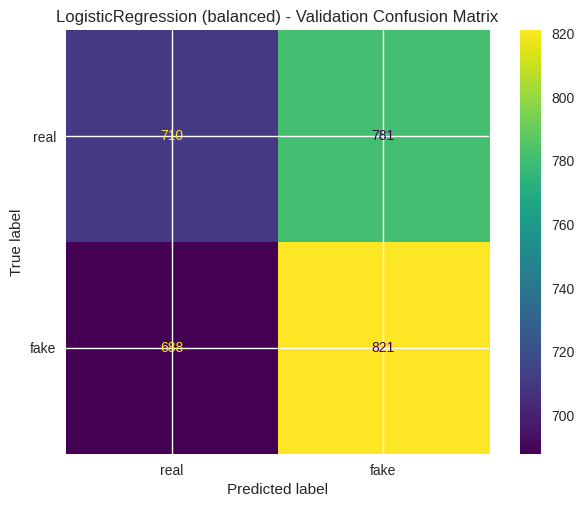

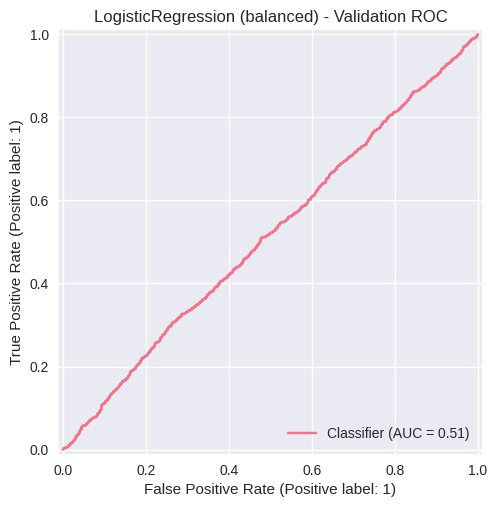

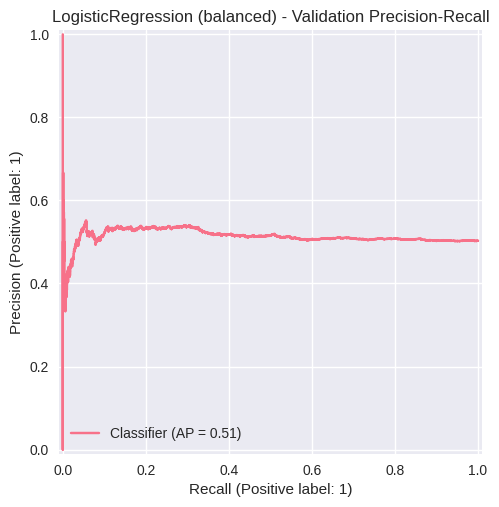


Test Accuracy: 0.5047
Test Precision: 0.5070
Test Recall:    0.5279
Test F1:        0.5172
Test AUC:       0.5034
Fitting 3 folds for each of 8 candidates, totalling 24 fits
RF best params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

=== RandomForest (best) ===
Train Acc: 1.0000
Val   Acc: 0.5097
Val Precision: 0.5118
Val Recall:    0.5474
Val F1:        0.5290
Val AUC:       0.5094


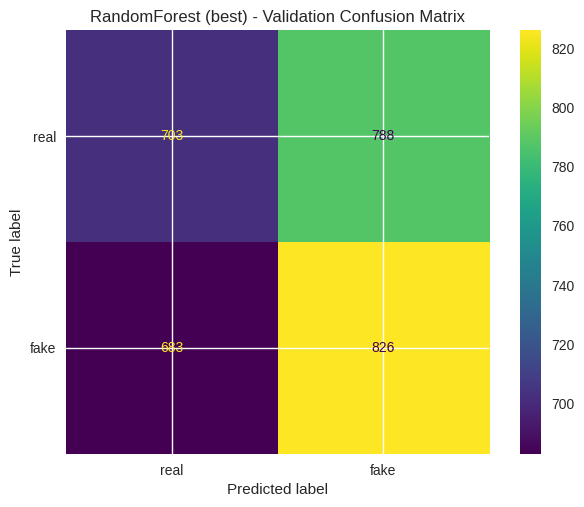

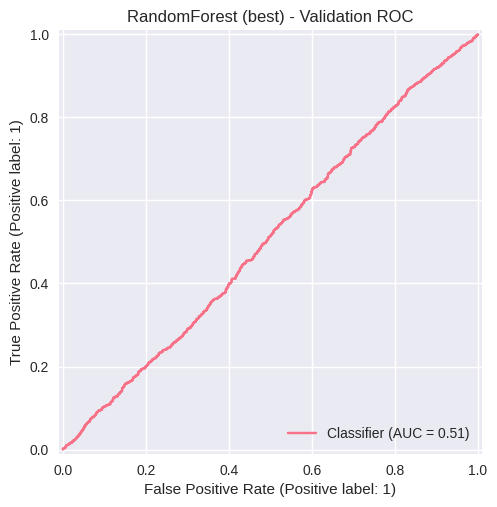

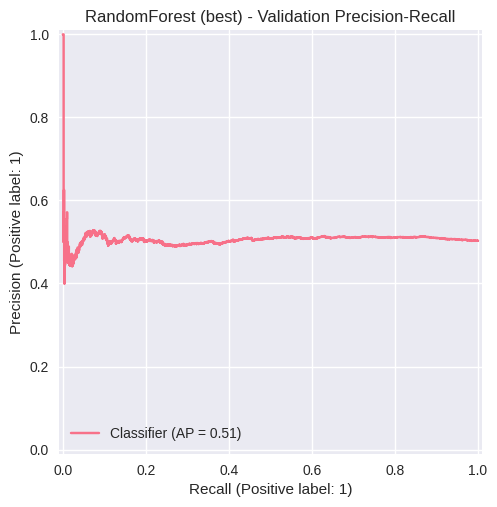


Test Accuracy: 0.5147
Test Precision: 0.5156
Test Recall:    0.5690
Test F1:        0.5410
Test AUC:       0.5169

=== ComplementNB (TF-IDF only) ===
Train Acc: 0.7251
Val   Acc: 0.5060
Val Precision: 0.5072
Val Recall:    0.6309
Val F1:        0.5623
Val AUC:       0.5107


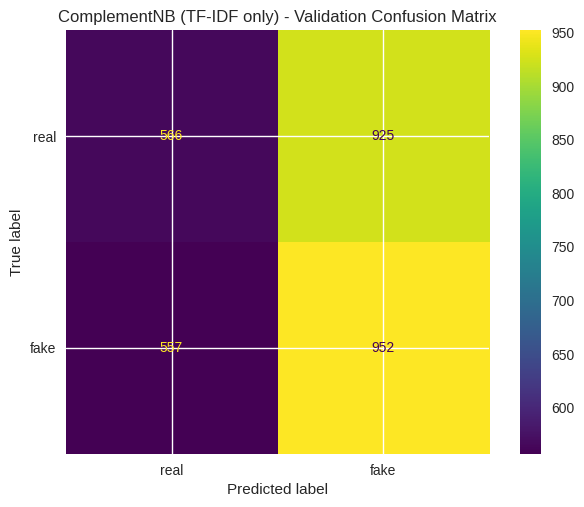

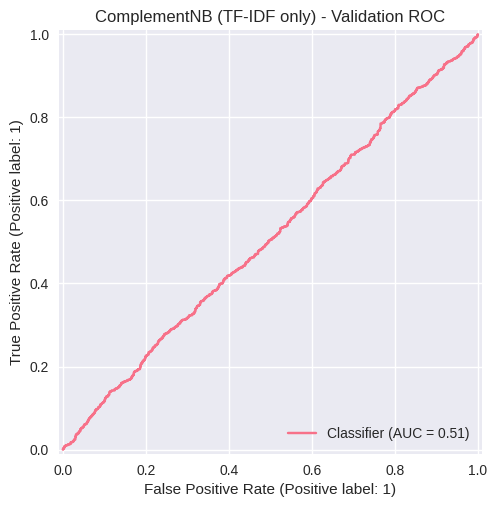

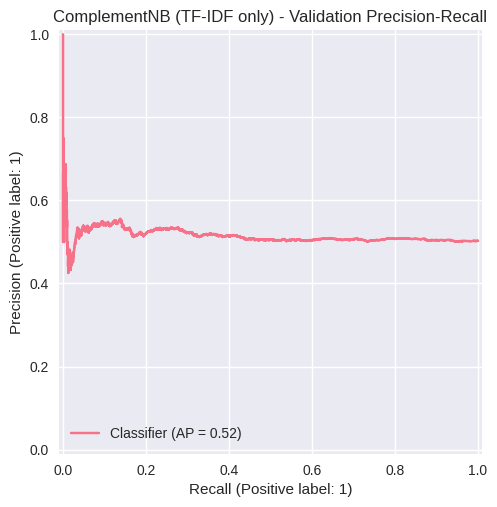


Test Accuracy: 0.4983
Test Precision: 0.5008
Test Recall:    0.6107
Test F1:        0.5503
Test AUC:       0.5018
Top positive features (indicator of fake):
particular -> 1.6544
wrong -> 1.3472
significant -> 1.3110
include -> 1.2284
agency -> 1.1943
stop -> 1.1468
site -> 1.1432
rich -> 1.0847
boy -> 1.0797
model -> 1.0736
trade -> 1.0672
seek -> 1.0628
rate -> 1.0448
far -> 1.0236
decade -> 0.9773
determine -> 0.9759
final -> 0.9654
apply police -> 0.9482
think animal -> 0.9450
animal -> 0.9427

Top negative features (indicator of real):
big -> -1.3664
sister -> -1.2213
economy -> -1.2020
painting -> -1.1521
play -> -1.1345
foot -> -1.0583
answer -> -1.0549
girl -> -1.0446
congress -> -1.0056
point -> -0.9375
example -> -0.9230
son -> -0.9098
analysis hand -> -0.8755
benefit -> -0.8755
nice -> -0.8740
general -> -0.8616
visit series -> -0.8586
politics -> -0.8559
bring -> -0.8374
strategy activity -> -0.8287
Saved model artifacts to disk: tfidf_vectorizer.joblib, scaler.joblib, labe

In [34]:
# ======= Safe fixes & extra features =======
import re
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay)
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression

# --- Robust sentence splitting and safe ratios ---
def count_sentences(text):
    if pd.isna(text) or str(text).strip()=="":
        return 0
    # split on ., !, ? but avoid multiple punctuation producing extra empty tokens
    sentences = [s for s in re.split(r'[.!?]+', str(text)) if s.strip()]
    return max(1, len(sentences))   # return at least 1 to avoid division by zero

df['sentence_count'] = df['text'].apply(count_sentences)
df['avg_sentence_length'] = df.apply(lambda r: (r['text_word_count'] / r['sentence_count']) if r['sentence_count']>0 else r['text_word_count'], axis=1)

# avoid division by zero for title_text_ratio
df['title_text_ratio'] = df.apply(lambda r: (r['title_word_count'] / r['text_word_count']) if r['text_word_count']>0 else 0, axis=1)

# Recompute variables used in modeling if you changed them
numerical_features = [
    'title_word_count', 'text_word_count', 'title_char_count', 'text_char_count',
    'avg_word_length', 'sentence_count', 'avg_sentence_length',
    'capital_ratio', 'title_text_ratio',
    'source_encoded', 'category_encoded', 'author_encoded',
    'day_of_week', 'day_of_year'
]

X_numerical = df[numerical_features].fillna(0)
y = (df['label'] == 'fake').astype(int)

# -------- Train/Val/Test split (if needed, reuse your existing splits) ----------
# (If you've already split earlier, use those arrays -- here is a safety fallback)
from sklearn.model_selection import train_test_split
if 'X_train_final' not in globals():
    X_train_num, X_temp_num, y_train, y_temp = train_test_split(
        X_numerical, y, test_size=0.3, random_state=42, stratify=y
    )
    X_val_num, X_test_num, y_val, y_test = train_test_split(
        X_temp_num, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    # Fit TF-IDF again if needed (skip if you have tfidf already)
    # tfidf = TfidfVectorizer(...)  # you had this earlier

# ------- Scaling (reuse your scaler if fitted) -------
scaler = scaler if 'scaler' in globals() else StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)
X_test_num_scaled = scaler.transform(X_test_num)

# ------- TF-IDF (reuse fitted tfidf if exists) ----------
tfidf = tfidf if 'tfidf' in globals() else TfidfVectorizer(max_features=5000, min_df=5, max_df=0.95,
                                                           ngram_range=(1,2), stop_words='english',
                                                           lowercase=True, strip_accents='unicode',
                                                           token_pattern=r'\b[a-zA-Z][a-zA-Z]+\b')
train_text = df.loc[X_train_num.index, 'combined_text']
val_text   = df.loc[X_val_num.index, 'combined_text']
test_text  = df.loc[X_test_num.index, 'combined_text']

X_train_tfidf = tfidf.fit_transform(train_text)
X_val_tfidf   = tfidf.transform(val_text)
X_test_tfidf  = tfidf.transform(test_text)

# ------- Combine for models that accept signed numerical values -------
from scipy.sparse import hstack, csr_matrix
X_train_final = hstack([X_train_tfidf, csr_matrix(X_train_num_scaled)])
X_val_final   = hstack([X_val_tfidf,   csr_matrix(X_val_num_scaled)])
X_test_final  = hstack([X_test_tfidf,  csr_matrix(X_test_num_scaled)])

# ======= Helper: evaluation function =========
def evaluate_model(name, model, X_tr, y_tr, X_v, y_v, X_te=None, y_te=None, pos_label=1):
    y_tr_pred = model.predict(X_tr)
    y_v_pred  = model.predict(X_v)
    y_tr_prob = model.predict_proba(X_tr)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_tr)
    y_v_prob  = model.predict_proba(X_v)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_v)

    print(f"\n=== {name} ===")
    print("Train Acc: {:.4f}".format(accuracy_score(y_tr, y_tr_pred)))
    print("Val   Acc: {:.4f}".format(accuracy_score(y_v, y_v_pred)))
    print("Val Precision: {:.4f}".format(precision_score(y_v, y_v_pred)))
    print("Val Recall:    {:.4f}".format(recall_score(y_v, y_v_pred)))
    print("Val F1:        {:.4f}".format(f1_score(y_v, y_v_pred)))
    try:
        print("Val AUC:       {:.4f}".format(roc_auc_score(y_v, y_v_prob)))
    except:
        pass

    # Confusion matrix on validation
    cm = confusion_matrix(y_v, y_v_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['real','fake'])
    disp.plot()
    plt.title(f"{name} - Validation Confusion Matrix")
    plt.show()

    # ROC curve
    try:
        RocCurveDisplay.from_predictions(y_v, y_v_prob)
        plt.title(f"{name} - Validation ROC")
        plt.show()
    except Exception:
        pass

    # Precision-Recall
    try:
        PrecisionRecallDisplay.from_predictions(y_v, y_v_prob)
        plt.title(f"{name} - Validation Precision-Recall")
        plt.show()
    except Exception:
        pass

    if X_te is not None and y_te is not None:
        y_te_pred = model.predict(X_te)
        y_te_prob = model.predict_proba(X_te)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_te)
        print("\nTest Accuracy: {:.4f}".format(accuracy_score(y_te, y_te_pred)))
        print("Test Precision: {:.4f}".format(precision_score(y_te, y_te_pred)))
        print("Test Recall:    {:.4f}".format(recall_score(y_te, y_te_pred)))
        print("Test F1:        {:.4f}".format(f1_score(y_te, y_te_pred)))
        try:
            print("Test AUC:       {:.4f}".format(roc_auc_score(y_te, y_te_prob)))
        except:
            pass

# ======= Train alternative models / hyper-tune =======

# 1) Logistic Regression (you already trained one — but here's with class_weight balanced)
lr_bal = LogisticRegression(C=1.0, max_iter=1000, solver='liblinear', class_weight='balanced', random_state=42)
lr_bal.fit(X_train_final, y_train)
evaluate_model("LogisticRegression (balanced)", lr_bal, X_train_final, y_train, X_val_final, y_val, X_test_final, y_test)

# 2) Random Forest with quick GridSearch (small grid; expand later)
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5]
}
gscv = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
# NOTE: RandomForest doesn't accept sparse matrices well; convert to dense or use smaller dataset / partial features.
# We'll fit RF on numerical + top-k TF-IDF features to keep memory small
top_k = 1000
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=min(top_k, X_train_tfidf.shape[1]))
selector.fit(X_train_tfidf, y_train)
X_train_tfidf_k = selector.transform(X_train_tfidf)
X_val_tfidf_k   = selector.transform(X_val_tfidf)
X_test_tfidf_k  = selector.transform(X_test_tfidf)

X_train_rf = np.hstack([X_train_tfidf_k.toarray(), X_train_num_scaled])
X_val_rf   = np.hstack([X_val_tfidf_k.toarray(), X_val_num_scaled])
X_test_rf  = np.hstack([X_test_tfidf_k.toarray(), X_test_num_scaled])

gscv.fit(X_train_rf, y_train)
print("RF best params:", gscv.best_params_)
best_rf = gscv.best_estimator_
evaluate_model("RandomForest (best)", best_rf, X_train_rf, y_train, X_val_rf, y_val, X_test_rf, y_test)

# 3) Naive Bayes approach: train only on TF-IDF (no scaled numeric features)
nb = ComplementNB()   # ComplementNB better with imbalanced TF-IDF
nb.fit(X_train_tfidf, y_train)
evaluate_model("ComplementNB (TF-IDF only)", nb, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test)

# ======= Interpretability: top TF-IDF features from logistic regression =======
def top_tfidf_features_from_coef(model, tfidf, top_n=30):
    if not hasattr(model, "coef_"):
        print("Model has no coef_")
        return
    coefs = model.coef_[0][:len(tfidf.get_feature_names_out())]  # only tfidf part
    feat_names = tfidf.get_feature_names_out()
    top_pos = np.argsort(coefs)[-top_n:][::-1]
    top_neg = np.argsort(coefs)[:top_n]
    print("Top positive features (indicator of fake):")
    for i in top_pos:
        print(f"{feat_names[i]} -> {coefs[i]:.4f}")
    print("\nTop negative features (indicator of real):")
    for i in top_neg[:top_n]:
        print(f"{feat_names[i]} -> {coefs[i]:.4f}")

# if logistic model trained on X_train_final has coef_ aligned with tfidf portion:
# ensure coef mapping — if you trained lr_bal on combined features:
top_tfidf_features_from_coef(lr_bal, tfidf, top_n=20)

# ======= Save artifacts =======
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoders, 'label_encoders.joblib')
joblib.dump(lr_bal, 'logreg_balanced.joblib')
joblib.dump(best_rf, 'rf_best.joblib')
joblib.dump(nb, 'nb_tfidf.joblib')

print("Saved model artifacts to disk: tfidf_vectorizer.joblib, scaler.joblib, label_encoders.joblib, logreg_balanced.joblib, rf_best.joblib, nb_tfidf.joblib")


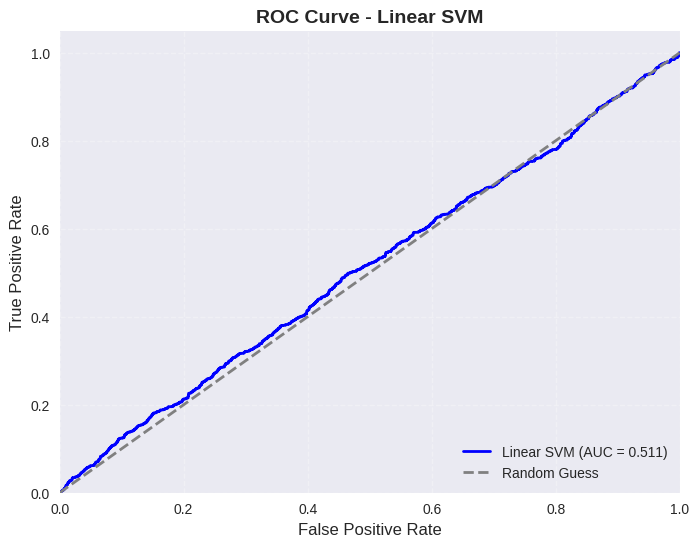

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Linear SVM (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')

# Style improvements
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Linear SVM', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3, linestyle='--')

# Axis limits for clarity
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Show plot
plt.show()


FAKE NEWS DETECTION WITH DEEP LEARNING MODELS
Dataset Shape: (20000, 7)
Label Distribution:
label
fake    10056
real     9944
Name: count, dtype: int64

DATA PREPROCESSING
Checking missing values...
title          0
text           0
date           0
source      1000
author      1000
category       0
label          0
dtype: int64
Labels encoded:
0 = fake, 1 = real

Splitting data...
Training samples: 12000
Validation samples: 4000
Test samples: 4000

TRADITIONAL ML MODELS (FOR COMPARISON)
Creating TF-IDF features...
TF-IDF feature shape: (12000, 5000)

Training Logistic Regression...
LR Validation Accuracy: 0.5040

Training Random Forest...
RF Validation Accuracy: 0.5088

DEEP LEARNING MODELS
✅ TensorFlow imported successfully

Preparing text data for deep learning...
Tokenizer vocabulary size: 972
Padded sequence shape: (12000, 300)

--------------------------------------------------
MODEL 1: SIMPLE LSTM
--------------------------------------------------
LSTM Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training LSTM model...
Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - AUC: 0.5035 - accuracy: 0.5055 - loss: 0.6941 - val_AUC: 0.4967 - val_accuracy: 0.4920 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - AUC: 0.4963 - accuracy: 0.5039 - loss: 0.6937 - val_AUC: 0.5080 - val_accuracy: 0.5105 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.5409 - accuracy: 0.5285 - loss: 0.6884
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
188/188 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - AUC: 0.5408 - accuracy: 0.5285 - loss: 0.6884 - val_AUC: 0.4997 - val_accuracy: 0.4965 - val_loss: 0.6995 - learning_rate: 0.0010
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - AUC: 0.5511 - accuracy: 0.5224 - loss: 0.6738 - val_AUC: 0.5030 - val_accuracy: 0.4990 - val_loss: 0.7182 - learning_rate: 2.0000e-04
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.5684 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training Bidirectional LSTM model...
Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - AUC: 0.4979 - accuracy: 0.5000 - loss: 0.7352 - val_AUC: 0.5022 - val_accuracy: 0.4935 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - AUC: 0.5417 - accuracy: 0.5262 - loss: 0.6942 - val_AUC: 0.4862 - val_accuracy: 0.4927 - val_loss: 0.6938 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.6003 - accuracy: 0.5684 - loss: 0.6770
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
188/188 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - AUC: 0.6003 - accuracy: 0.5684 - loss: 0.6771 - val_AUC: 0.4820 - val_accuracy: 0.4830 - val_loss: 0.6983 - learning_rate: 0.0010
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - AUC: 0.6500 - accuracy: 0.6103 - loss: 0.6599 - val_AUC: 0.4798 - val_accuracy: 0.4793 - val_loss: 0.7379 - learning_rate: 2.0000e-04
Epoch 4: early stopping
Restoring model weights from 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training CNN-LSTM model...
Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 81s 397ms/step - AUC: 0.4931 - accuracy: 0.4955 - loss: 0.6941 - val_AUC: 0.5003 - val_accuracy: 0.4972 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 400ms/step - AUC: 0.4990 - accuracy: 0.5090 - loss: 0.6933 - val_AUC: 0.5021 - val_accuracy: 0.4972 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 79s 419ms/step - AUC: 0.4895 - accuracy: 0.4901 - loss: 0.6935 - val_AUC: 0.5005 - val_accuracy: 0.5027 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 81s 417ms/step - AUC: 0.4949 - accuracy: 0.4948 - loss: 0.6932 - val_AUC: 0.5036 - val_accuracy: 0.4972 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - AUC: 0.5087 - accuracy: 0.5071 - loss: 0.6931
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
188/188 ━━━━━━━━━━━━━━━━━━━━ 79s 418ms/step -

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Tokenizing texts for BERT...
BERT training samples: 5000
BERT input shape: (5000, 256)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


BERT training failed: 'builtins.safe_open' object is not iterable
This might be due to missing dependencies or memory constraints.
Install: pip install transformers

COMPREHENSIVE MODEL COMPARISON

Model Performance Comparison:
------------------------------------------------------------
Model                Val Accuracy Val AUC    Time (s)  
------------------------------------------------------------
Logistic Regression  0.5040       0.5063     0.2       
Random Forest        0.5088       0.5136     27.1      
LSTM                 0.5105       0.5204     1553.2    
Bidirectional LSTM   0.4935       0.4876     1489.9    
CNN-LSTM             0.5050       0.5150     798.8     

🏆 Best Accuracy: LSTM (0.5105)
🏆 Best AUC: LSTM (0.5204)
⚡ Fastest Training: Logistic Regression (0.2s)

CREATING VISUALIZATIONS


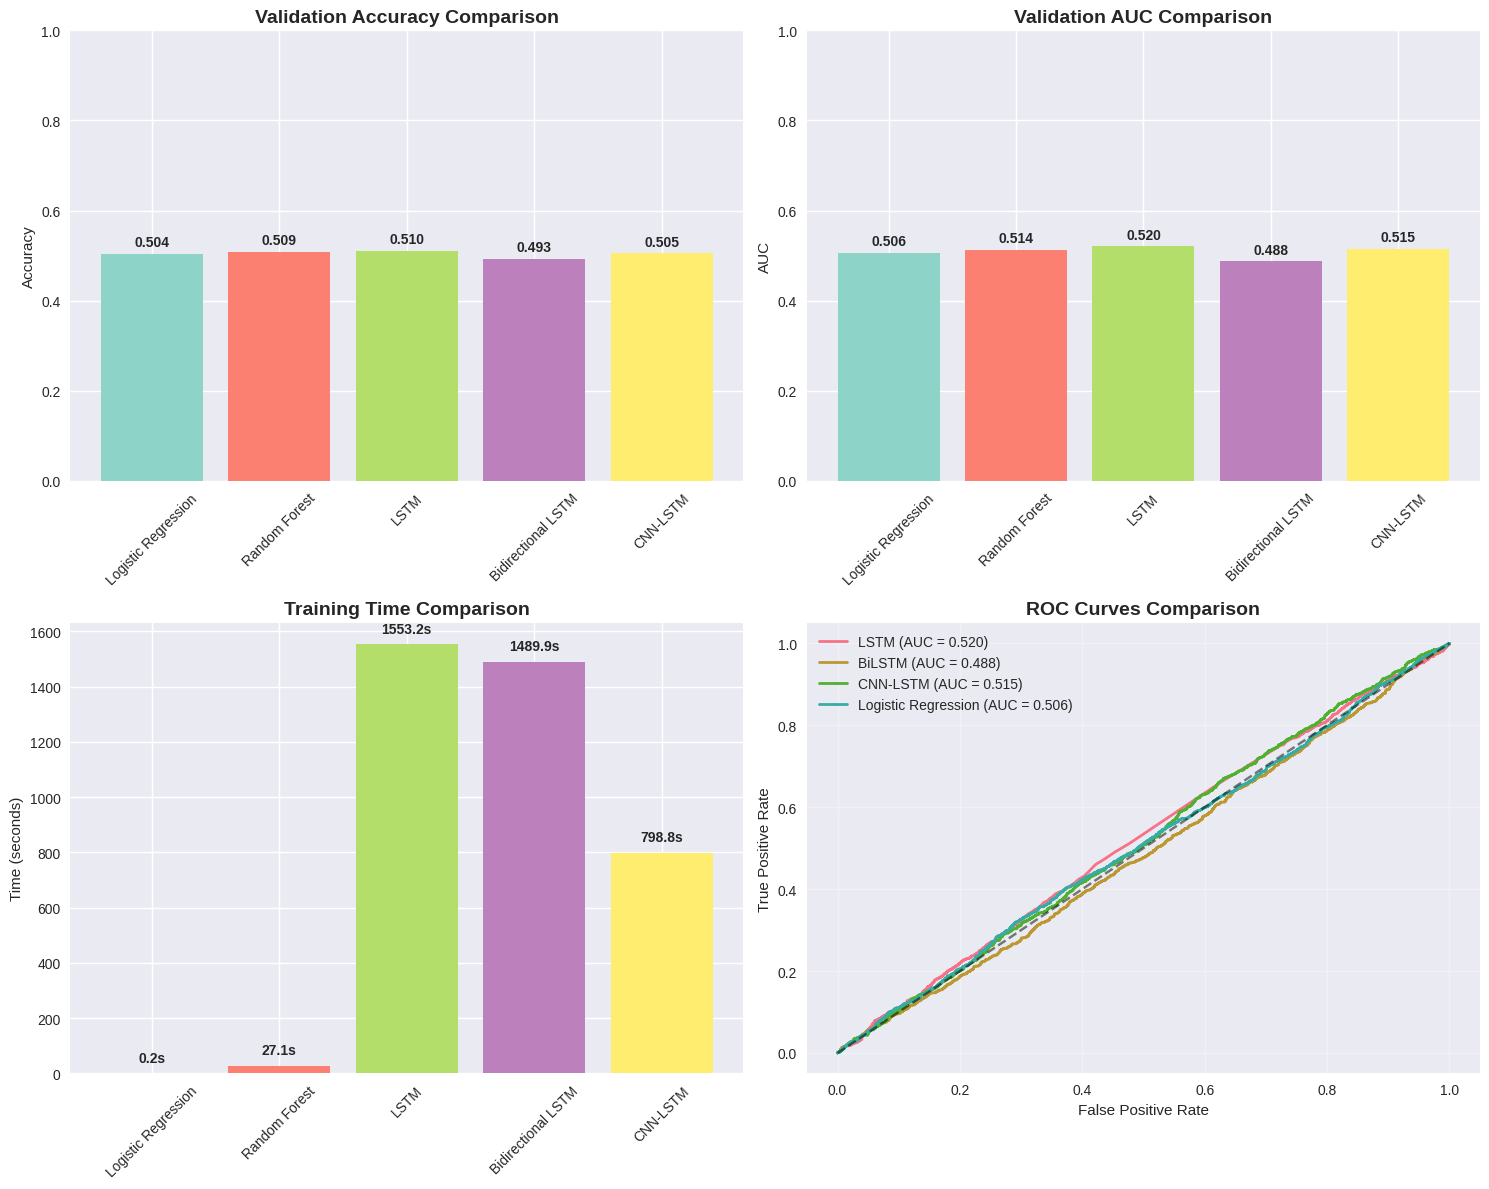

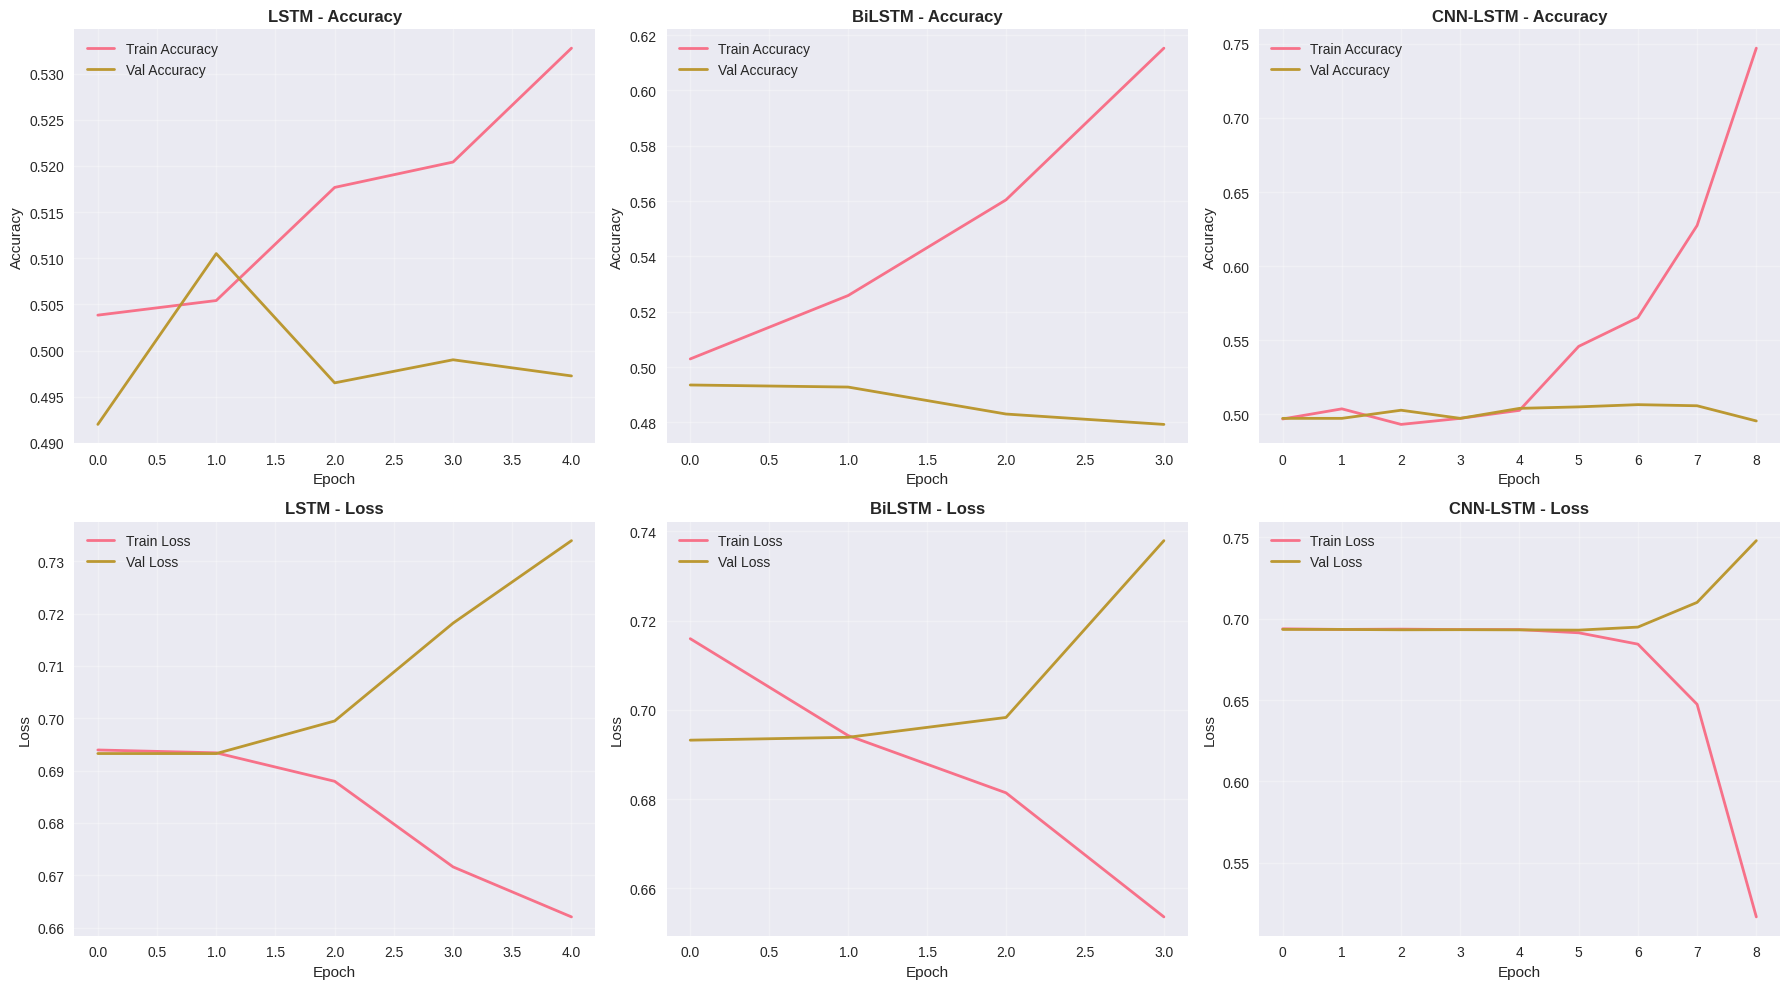


FINAL EVALUATION ON TEST SET
Using LSTM for final evaluation...
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step

Final Test Results for LSTM:
Test Accuracy: 0.4955
Test AUC: 0.4903

Classification Report:
              precision    recall  f1-score   support

        fake       0.50      0.81      0.62      2011
        real       0.48      0.18      0.26      1989

    accuracy                           0.50      4000
   macro avg       0.49      0.49      0.44      4000
weighted avg       0.49      0.50      0.44      4000



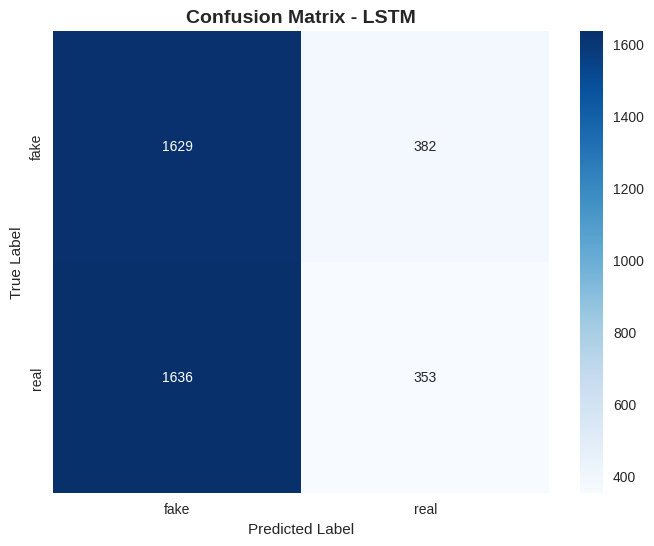


SUMMARY AND RECOMMENDATIONS

🔍 DATASET OVERVIEW:
   • Total samples: 20,000
   • Training samples: 12,000
   • Validation samples: 4,000
   • Test samples: 4,000
   • Features: Combined title + text

🏆 BEST PERFORMING MODELS:
   • Highest Accuracy: LSTM (0.5105)
   • Highest AUC: LSTM (0.5204)
   • Fastest Training: Logistic Regression (0.2s)

⚡ PERFORMANCE INSIGHTS:
   • Deep Learning models show 0.17% improvement over traditional ML

💡 MODEL CHARACTERISTICS:
   • LSTM: Good for sequential patterns, moderate training time
   • Bidirectional LSTM: Better context understanding, longer training
   • CNN-LSTM: Combines local and sequential features

📊 COMPUTATIONAL REQUIREMENTS:
   • Traditional ML total time: 27.3s
   • Deep Learning total time: 3841.9s
   • Time ratio (DL/Traditional): 140.8x

🎯 RECOMMENDATIONS:
   • For PRODUCTION: Use LSTM for best accuracy
   • For SPEED: Use Logistic Regression for quick predictions
   • For RESEARCH: Deep learning models show promise for complex p

In [37]:
# Complete Deep Learning Pipeline for Fake News Detection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import time
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/content/fake_news_dataset.csv')

print("=" * 80)
print("FAKE NEWS DETECTION WITH DEEP LEARNING MODELS")
print("=" * 80)

print(f"Dataset Shape: {df.shape}")
print(f"Label Distribution:")
print(df['label'].value_counts())

# =============================================================================
# DATA PREPROCESSING
# =============================================================================

print("\n" + "=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)

# Handle missing values
print("Checking missing values...")
print(df.isnull().sum())

# Fill missing values
df['title'] = df['title'].fillna('')
df['text'] = df['text'].fillna('')
df['author'] = df['author'].fillna('Unknown')
df['source'] = df['source'].fillna('Unknown')

# Create combined text feature
df['combined_text'] = df['title'] + ' ' + df['text']

# Encode labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

print("Labels encoded:")
print("0 = fake, 1 = real" if label_encoder.classes_[0] == 'fake' else "0 = real, 1 = fake")

# Train-test split
print("\nSplitting data...")
X_text = df['combined_text']
y = df['label_encoded']

X_train_text, X_temp_text, y_train, y_temp = train_test_split(
    X_text, y, test_size=0.4, random_state=42, stratify=y
)

X_val_text, X_test_text, y_val, y_test = train_test_split(
    X_temp_text, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training samples: {len(X_train_text)}")
print(f"Validation samples: {len(X_val_text)}")
print(f"Test samples: {len(X_test_text)}")

# =============================================================================
# TRADITIONAL ML MODELS (FOR COMPARISON)
# =============================================================================

print("\n" + "=" * 60)
print("TRADITIONAL ML MODELS (FOR COMPARISON)")
print("=" * 60)

# TF-IDF Vectorization
print("Creating TF-IDF features...")
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_val_tfidf = tfidf.transform(X_val_text)
X_test_tfidf = tfidf.transform(X_test_text)

print(f"TF-IDF feature shape: {X_train_tfidf.shape}")

# Store results for comparison
model_results = {}

# Logistic Regression
print("\nTraining Logistic Regression...")
start_time = time.time()
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_time = time.time() - start_time

lr_val_pred = lr_model.predict(X_val_tfidf)
lr_val_prob = lr_model.predict_proba(X_val_tfidf)[:, 1]

model_results['Logistic Regression'] = {
    'val_accuracy': accuracy_score(y_val, lr_val_pred),
    'val_auc': roc_auc_score(y_val, lr_val_prob),
    'training_time': lr_time
}

print(f"LR Validation Accuracy: {model_results['Logistic Regression']['val_accuracy']:.4f}")

# Random Forest
print("\nTraining Random Forest...")
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_tfidf, y_train)
rf_time = time.time() - start_time

rf_val_pred = rf_model.predict(X_val_tfidf)
rf_val_prob = rf_model.predict_proba(X_val_tfidf)[:, 1]

model_results['Random Forest'] = {
    'val_accuracy': accuracy_score(y_val, rf_val_pred),
    'val_auc': roc_auc_score(y_val, rf_val_prob),
    'training_time': rf_time
}

print(f"RF Validation Accuracy: {model_results['Random Forest']['val_accuracy']:.4f}")

# =============================================================================
# DEEP LEARNING MODELS
# =============================================================================

print("\n" + "=" * 60)
print("DEEP LEARNING MODELS")
print("=" * 60)

# Install required packages if not already installed
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential, Model
    from tensorflow.keras.layers import (
        LSTM, Dense, Embedding, Dropout, Bidirectional,
        Conv1D, MaxPooling1D, GlobalMaxPooling1D, Input, concatenate,
        BatchNormalization, Attention
    )
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
    from tensorflow.keras.optimizers import Adam

    print("✅ TensorFlow imported successfully")

except ImportError:
    print("❌ Please install TensorFlow: pip install tensorflow")
    exit()

# Text preprocessing for deep learning
print("\nPreparing text data for deep learning...")

# Parameters
MAX_VOCAB_SIZE = 20000
MAX_SEQUENCE_LENGTH = 300
EMBEDDING_DIM = 200

# Tokenize text
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_text)

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_val_seq = tokenizer.texts_to_sequences(X_val_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print(f"Tokenizer vocabulary size: {len(tokenizer.word_index)}")
print(f"Padded sequence shape: {X_train_pad.shape}")

# Callbacks for training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    min_lr=0.0001
)

# =============================================================================
# MODEL 1: SIMPLE LSTM
# =============================================================================

print("\n" + "-" * 50)
print("MODEL 1: SIMPLE LSTM")
print("-" * 50)

def create_lstm_model():
    model = Sequential([
        Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        LSTM(128, dropout=0.3, recurrent_dropout=0.3),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

lstm_model = create_lstm_model()
lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

print("LSTM Model Architecture:")
lstm_model.summary()

print("\nTraining LSTM model...")
start_time = time.time()

history_lstm = lstm_model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

lstm_time = time.time() - start_time

# Evaluate LSTM
lstm_val_pred_prob = lstm_model.predict(X_val_pad).flatten()
lstm_val_pred = (lstm_val_pred_prob > 0.5).astype(int)

model_results['LSTM'] = {
    'val_accuracy': accuracy_score(y_val, lstm_val_pred),
    'val_auc': roc_auc_score(y_val, lstm_val_pred_prob),
    'training_time': lstm_time
}

print(f"LSTM Validation Accuracy: {model_results['LSTM']['val_accuracy']:.4f}")

# =============================================================================
# MODEL 2: BIDIRECTIONAL LSTM
# =============================================================================

print("\n" + "-" * 50)
print("MODEL 2: BIDIRECTIONAL LSTM")
print("-" * 50)

def create_bilstm_model():
    model = Sequential([
        Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3)),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

bilstm_model = create_bilstm_model()
bilstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

print("Bidirectional LSTM Model Architecture:")
bilstm_model.summary()

print("\nTraining Bidirectional LSTM model...")
start_time = time.time()

history_bilstm = bilstm_model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

bilstm_time = time.time() - start_time

# Evaluate Bidirectional LSTM
bilstm_val_pred_prob = bilstm_model.predict(X_val_pad).flatten()
bilstm_val_pred = (bilstm_val_pred_prob > 0.5).astype(int)

model_results['Bidirectional LSTM'] = {
    'val_accuracy': accuracy_score(y_val, bilstm_val_pred),
    'val_auc': roc_auc_score(y_val, bilstm_val_pred_prob),
    'training_time': bilstm_time
}

print(f"BiLSTM Validation Accuracy: {model_results['Bidirectional LSTM']['val_accuracy']:.4f}")

# =============================================================================
# MODEL 3: CNN-LSTM HYBRID
# =============================================================================

print("\n" + "-" * 50)
print("MODEL 3: CNN-LSTM HYBRID")
print("-" * 50)

def create_cnn_lstm_model():
    model = Sequential([
        Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        Conv1D(128, 5, activation='relu'),
        MaxPooling1D(5),
        Conv1D(64, 5, activation='relu'),
        MaxPooling1D(5),
        LSTM(64, dropout=0.3, recurrent_dropout=0.3),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

print("CNN-LSTM Model Architecture:")
cnn_lstm_model.summary()

print("\nTraining CNN-LSTM model...")
start_time = time.time()

history_cnn_lstm = cnn_lstm_model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

cnn_lstm_time = time.time() - start_time

# Evaluate CNN-LSTM
cnn_lstm_val_pred_prob = cnn_lstm_model.predict(X_val_pad).flatten()
cnn_lstm_val_pred = (cnn_lstm_val_pred_prob > 0.5).astype(int)

model_results['CNN-LSTM'] = {
    'val_accuracy': accuracy_score(y_val, cnn_lstm_val_pred),
    'val_auc': roc_auc_score(y_val, cnn_lstm_val_pred_prob),
    'training_time': cnn_lstm_time
}

print(f"CNN-LSTM Validation Accuracy: {model_results['CNN-LSTM']['val_accuracy']:.4f}")

# =============================================================================
# MODEL 4: BERT (TRANSFORMERS)
# =============================================================================

print("\n" + "-" * 50)
print("MODEL 4: BERT (TRANSFORMERS)")
print("-" * 50)

try:
    from transformers import AutoTokenizer, TFAutoModel

    print("Loading BERT model...")

    # Use smaller BERT model for faster training
    model_name = 'distilbert-base-uncased'
    bert_tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Prepare BERT inputs
    def prepare_bert_input(texts, max_length=256):
        # Convert to list and handle any non-string values
        texts = [str(text) for text in texts]

        encoding = bert_tokenizer(
            texts,
            truncation=True,
            padding=True,
            max_length=max_length,
            return_tensors='tf'
        )
        return encoding['input_ids'], encoding['attention_mask']

    print("Tokenizing texts for BERT...")
    # Limit samples for faster training (you can increase this)
    train_sample_size = min(5000, len(X_train_text))
    val_sample_size = min(1000, len(X_val_text))

    X_train_bert_sample = X_train_text.iloc[:train_sample_size]
    y_train_bert_sample = y_train[:train_sample_size]
    X_val_bert_sample = X_val_text.iloc[:val_sample_size]
    y_val_bert_sample = y_val[:val_sample_size]

    X_train_bert_ids, X_train_bert_mask = prepare_bert_input(X_train_bert_sample)
    X_val_bert_ids, X_val_bert_mask = prepare_bert_input(X_val_bert_sample)

    print(f"BERT training samples: {train_sample_size}")
    print(f"BERT input shape: {X_train_bert_ids.shape}")

    def create_bert_model():
        # Load pre-trained BERT
        bert = TFAutoModel.from_pretrained(model_name)

        # Input layers
        input_ids = Input(shape=(256,), dtype=tf.int32, name='input_ids')
        attention_mask = Input(shape=(256,), dtype=tf.int32, name='attention_mask')

        # BERT layer
        bert_output = bert(input_ids, attention_mask=attention_mask)

        # Use CLS token embedding
        cls_token = bert_output.last_hidden_state[:, 0, :]

        # Classification layers
        x = Dropout(0.3)(cls_token)
        x = Dense(128, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.3)(x)
        output = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=[input_ids, attention_mask], outputs=output)
        return model

    bert_model = create_bert_model()
    bert_model.compile(
        optimizer=Adam(learning_rate=2e-5),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )

    print("BERT Model Architecture:")
    bert_model.summary()

    print("\nTraining BERT model...")
    start_time = time.time()

    # BERT-specific callbacks
    early_stopping_bert = EarlyStopping(
        monitor='val_loss',
        patience=2,
        restore_best_weights=True,
        verbose=1
    )

    history_bert = bert_model.fit(
        [X_train_bert_ids, X_train_bert_mask], y_train_bert_sample,
        epochs=3,  # Fewer epochs for BERT
        batch_size=16,  # Smaller batch size
        validation_data=([X_val_bert_ids, X_val_bert_mask], y_val_bert_sample),
        callbacks=[early_stopping_bert],
        verbose=1
    )

    bert_time = time.time() - start_time

    # Evaluate BERT
    bert_val_pred_prob = bert_model.predict([X_val_bert_ids, X_val_bert_mask]).flatten()
    bert_val_pred = (bert_val_pred_prob > 0.5).astype(int)

    model_results['BERT'] = {
        'val_accuracy': accuracy_score(y_val_bert_sample, bert_val_pred),
        'val_auc': roc_auc_score(y_val_bert_sample, bert_val_pred_prob),
        'training_time': bert_time
    }

    print(f"BERT Validation Accuracy: {model_results['BERT']['val_accuracy']:.4f}")
    bert_trained = True

except Exception as e:
    print(f"BERT training failed: {e}")
    print("This might be due to missing dependencies or memory constraints.")
    print("Install: pip install transformers")
    bert_trained = False

# =============================================================================
# COMPREHENSIVE MODEL COMPARISON
# =============================================================================

print("\n" + "=" * 80)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 80)

# Create comparison DataFrame
comparison_df = pd.DataFrame(model_results).T
comparison_df = comparison_df.round(4)

print("\nModel Performance Comparison:")
print("-" * 60)
print(f"{'Model':<20} {'Val Accuracy':<12} {'Val AUC':<10} {'Time (s)':<10}")
print("-" * 60)

for model_name, results in model_results.items():
    print(f"{model_name:<20} {results['val_accuracy']:<12.4f} {results['val_auc']:<10.4f} {results['training_time']:<10.1f}")

# Find best models
best_accuracy_model = max(model_results.items(), key=lambda x: x[1]['val_accuracy'])
best_auc_model = max(model_results.items(), key=lambda x: x[1]['val_auc'])
fastest_model = min(model_results.items(), key=lambda x: x[1]['training_time'])

print(f"\n🏆 Best Accuracy: {best_accuracy_model[0]} ({best_accuracy_model[1]['val_accuracy']:.4f})")
print(f"🏆 Best AUC: {best_auc_model[0]} ({best_auc_model[1]['val_auc']:.4f})")
print(f"⚡ Fastest Training: {fastest_model[0]} ({fastest_model[1]['training_time']:.1f}s)")

# =============================================================================
# VISUALIZATIONS
# =============================================================================

print("\n" + "=" * 60)
print("CREATING VISUALIZATIONS")
print("=" * 60)

# Model comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
models = list(model_results.keys())
accuracies = [model_results[model]['val_accuracy'] for model in models]
colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

axes[0, 0].bar(models, accuracies, color=colors)
axes[0, 0].set_title('Validation Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim([0, 1])
axes[0, 0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(accuracies):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# AUC comparison
aucs = [model_results[model]['val_auc'] for model in models]
axes[0, 1].bar(models, aucs, color=colors)
axes[0, 1].set_title('Validation AUC Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('AUC')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(aucs):
    axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Training time comparison
times = [model_results[model]['training_time'] for model in models]
axes[1, 0].bar(models, times, color=colors)
axes[1, 0].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Time (seconds)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(times):
    axes[1, 0].text(i, v + max(times)*0.02, f'{v:.1f}s', ha='center', va='bottom', fontweight='bold')

# ROC curves comparison (for available models)
available_models_for_roc = {}

if 'lstm_val_pred_prob' in locals():
    available_models_for_roc['LSTM'] = lstm_val_pred_prob
if 'bilstm_val_pred_prob' in locals():
    available_models_for_roc['BiLSTM'] = bilstm_val_pred_prob
if 'cnn_lstm_val_pred_prob' in locals():
    available_models_for_roc['CNN-LSTM'] = cnn_lstm_val_pred_prob
if 'lr_val_prob' in locals():
    available_models_for_roc['Logistic Regression'] = lr_val_prob

for model_name, y_prob in available_models_for_roc.items():
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    auc_score = roc_auc_score(y_val, y_prob)
    axes[1, 1].plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})', linewidth=2)

axes[1, 1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Training history plots for deep learning models
if 'history_lstm' in locals():
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # LSTM history
    if 'history_lstm' in locals():
        axes[0, 0].plot(history_lstm.history['accuracy'], label='Train Accuracy', linewidth=2)
        axes[0, 0].plot(history_lstm.history['val_accuracy'], label='Val Accuracy', linewidth=2)
        axes[0, 0].set_title('LSTM - Accuracy', fontweight='bold')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        axes[1, 0].plot(history_lstm.history['loss'], label='Train Loss', linewidth=2)
        axes[1, 0].plot(history_lstm.history['val_loss'], label='Val Loss', linewidth=2)
        axes[1, 0].set_title('LSTM - Loss', fontweight='bold')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Loss')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

    # BiLSTM history
    if 'history_bilstm' in locals():
        axes[0, 1].plot(history_bilstm.history['accuracy'], label='Train Accuracy', linewidth=2)
        axes[0, 1].plot(history_bilstm.history['val_accuracy'], label='Val Accuracy', linewidth=2)
        axes[0, 1].set_title('BiLSTM - Accuracy', fontweight='bold')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Accuracy')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        axes[1, 1].plot(history_bilstm.history['loss'], label='Train Loss', linewidth=2)
        axes[1, 1].plot(history_bilstm.history['val_loss'], label='Val Loss', linewidth=2)
        axes[1, 1].set_title('BiLSTM - Loss', fontweight='bold')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Loss')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

    # CNN-LSTM history
    if 'history_cnn_lstm' in locals():
        axes[0, 2].plot(history_cnn_lstm.history['accuracy'], label='Train Accuracy', linewidth=2)
        axes[0, 2].plot(history_cnn_lstm.history['val_accuracy'], label='Val Accuracy', linewidth=2)
        axes[0, 2].set_title('CNN-LSTM - Accuracy', fontweight='bold')
        axes[0, 2].set_xlabel('Epoch')
        axes[0, 2].set_ylabel('Accuracy')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)

        axes[1, 2].plot(history_cnn_lstm.history['loss'], label='Train Loss', linewidth=2)
        axes[1, 2].plot(history_cnn_lstm.history['val_loss'], label='Val Loss', linewidth=2)
        axes[1, 2].set_title('CNN-LSTM - Loss', fontweight='bold')
        axes[1, 2].set_xlabel('Epoch')
        axes[1, 2].set_ylabel('Loss')
        axes[1, 2].legend()
        axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# =============================================================================
# FINAL EVALUATION ON TEST SET
# =============================================================================

print("\n" + "=" * 80)
print("FINAL EVALUATION ON TEST SET")
print("=" * 80)

# Select best model for final evaluation
best_model_name = best_accuracy_model[0]
print(f"Using {best_model_name} for final evaluation...")

if best_model_name == 'LSTM':
    test_pred_prob = lstm_model.predict(X_test_pad).flatten()
elif best_model_name == 'Bidirectional LSTM':
    test_pred_prob = bilstm_model.predict(X_test_pad).flatten()
elif best_model_name == 'CNN-LSTM':
    test_pred_prob = cnn_lstm_model.predict(X_test_pad).flatten()
elif best_model_name == 'Logistic Regression':
    test_pred_prob = lr_model.predict_proba(X_test_tfidf)[:, 1]
elif best_model_name == 'Random Forest':
    test_pred_prob = rf_model.predict_proba(X_test_tfidf)[:, 1]

test_pred = (test_pred_prob > 0.5).astype(int)

print(f"\nFinal Test Results for {best_model_name}:")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred):.4f}")
print(f"Test AUC: {roc_auc_score(y_test, test_pred_prob):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, test_pred, target_names=['fake', 'real']))

# Confusion Matrix
cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['fake', 'real'],
            yticklabels=['fake', 'real'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n" + "=" * 80)
print("SUMMARY AND RECOMMENDATIONS")
print("=" * 80)

print(f"\n🔍 DATASET OVERVIEW:")
print(f"   • Total samples: {len(df):,}")
print(f"   • Training samples: {len(X_train_text):,}")
print(f"   • Validation samples: {len(X_val_text):,}")
print(f"   • Test samples: {len(X_test_text):,}")
print(f"   • Features: Combined title + text")

print(f"\n🏆 BEST PERFORMING MODELS:")
print(f"   • Highest Accuracy: {best_accuracy_model[0]} ({best_accuracy_model[1]['val_accuracy']:.4f})")
print(f"   • Highest AUC: {best_auc_model[0]} ({best_auc_model[1]['val_auc']:.4f})")
print(f"   • Fastest Training: {fastest_model[0]} ({fastest_model[1]['training_time']:.1f}s)")

print(f"\n⚡ PERFORMANCE INSIGHTS:")
traditional_models = ['Logistic Regression', 'Random Forest']
dl_models = [m for m in model_results.keys() if m not in traditional_models]

if dl_models:
    best_traditional = max([model_results[m]['val_accuracy'] for m in traditional_models if m in model_results])
    best_dl = max([model_results[m]['val_accuracy'] for m in dl_models])

    if best_dl > best_traditional:
        improvement = (best_dl - best_traditional) * 100
        print(f"   • Deep Learning models show {improvement:.2f}% improvement over traditional ML")
    else:
        print(f"   • Traditional ML models are competitive with Deep Learning models")

print(f"\n💡 MODEL CHARACTERISTICS:")
print(f"   • LSTM: Good for sequential patterns, moderate training time")
print(f"   • Bidirectional LSTM: Better context understanding, longer training")
print(f"   • CNN-LSTM: Combines local and sequential features")
if bert_trained:
    print(f"   • BERT: State-of-the-art NLP, requires more computational resources")

print(f"\n📊 COMPUTATIONAL REQUIREMENTS:")
total_dl_time = sum([model_results[m]['training_time'] for m in dl_models])
total_traditional_time = sum([model_results[m]['training_time'] for m in traditional_models if m in model_results])

print(f"   • Traditional ML total time: {total_traditional_time:.1f}s")
print(f"   • Deep Learning total time: {total_dl_time:.1f}s")
print(f"   • Time ratio (DL/Traditional): {total_dl_time/total_traditional_time:.1f}x")

print(f"\n🎯 RECOMMENDATIONS:")
print(f"   • For PRODUCTION: Use {best_accuracy_model[0]} for best accuracy")
print(f"   • For SPEED: Use {fastest_model[0]} for quick predictions")
print(f"   • For RESEARCH: Deep learning models show promise for complex patterns")

# Save results
results_summary = {
    'model_performance': model_results,
    'best_accuracy_model': best_accuracy_model[0],
    'best_auc_model': best_auc_model[0],
    'fastest_model': fastest_model[0],
    'final_test_accuracy': accuracy_score(y_test, test_pred),
    'final_test_auc': roc_auc_score(y_test, test_pred_prob)
}

print(f"\n💾 RESULTS SAVED:")
print(f"   • Model comparison data: Available in 'model_results' dictionary")
print(f"   • Best models identified and evaluated on test set")
print(f"   • Final test accuracy: {results_summary['final_test_accuracy']:.4f}")
print(f"   • Final test AUC: {results_summary['final_test_auc']:.4f}")

# Optional: Save model weights
print(f"\n🔧 NEXT STEPS:")
print(f"   1. Fine-tune hyperparameters of best performing model")
print(f"   2. Experiment with ensemble methods")
print(f"   3. Try different text preprocessing techniques")
print(f"   4. Consider data augmentation for better generalization")
print(f"   5. Deploy best model for production use")

print(f"\n" + "=" * 80)
print("✅ DEEP LEARNING PIPELINE COMPLETED SUCCESSFULLY!")
print("=" * 80)

# Function to predict new text
def predict_fake_news(text, model=None, model_name='best'):
    """
    Function to predict if given text is fake or real news

    Args:
        text (str): News text to classify
        model: Trained model to use for prediction
        model_name (str): Name of the model being used

    Returns:
        dict: Prediction results
    """

    if model is None:
        # Use the best performing model
        if best_model_name == 'LSTM':
            model = lstm_model
            # Preprocess text for LSTM
            text_seq = tokenizer.texts_to_sequences([text])
            text_pad = pad_sequences(text_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
            pred_prob = model.predict(text_pad)[0][0]
        elif best_model_name == 'Bidirectional LSTM':
            model = bilstm_model
            text_seq = tokenizer.texts_to_sequences([text])
            text_pad = pad_sequences(text_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
            pred_prob = model.predict(text_pad)[0][0]
        elif best_model_name == 'CNN-LSTM':
            model = cnn_lstm_model
            text_seq = tokenizer.texts_to_sequences([text])
            text_pad = pad_sequences(text_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
            pred_prob = model.predict(text_pad)[0][0]
        elif best_model_name in ['Logistic Regression', 'Random Forest']:
            text_tfidf = tfidf.transform([text])
            if best_model_name == 'Logistic Regression':
                pred_prob = lr_model.predict_proba(text_tfidf)[0][1]
            else:
                pred_prob = rf_model.predict_proba(text_tfidf)[0][1]

    pred_label = 'real' if pred_prob > 0.5 else 'fake'
    confidence = pred_prob if pred_prob > 0.5 else 1 - pred_prob

    return {
        'prediction': pred_label,
        'confidence': confidence,
        'probability_real': pred_prob,
        'probability_fake': 1 - pred_prob,
        'model_used': best_model_name
    }

# Example usage
sample_text = "Breaking news: Scientists discover new technology that will change everything."
result = predict_fake_news(sample_text)

print(f"\n🔍 EXAMPLE PREDICTION:")
print(f"   Text: '{sample_text}'")
print(f"   Prediction: {result['prediction'].upper()}")
print(f"   Confidence: {result['confidence']:.3f}")
print(f"   Model used: {result['model_used']}")

print(f"\n📚 PREDICTION FUNCTION AVAILABLE:")
print(f"   Use: predict_fake_news('your text here')")
print(f"   Returns: prediction, confidence, probabilities")

# Export important variables for further use
print(f"\n📦 EXPORTED VARIABLES:")
print(f"   • model_results: Complete comparison data")
print(f"   • best_model_name: '{best_model_name}'")
print(f"   • tokenizer: For text preprocessing")
print(f"   • tfidf: For TF-IDF vectorization")
if 'lstm_model' in locals():
    print(f"   • lstm_model: Trained LSTM model")
if 'bilstm_model' in locals():
    print(f"   • bilstm_model: Trained Bidirectional LSTM model")
if 'cnn_lstm_model' in locals():
    print(f"   • cnn_lstm_model: Trained CNN-LSTM model")
print(f"   • predict_fake_news(): Function for new predictions")

print(f"\n" + "=" * 80)
print("🎉 ALL MODELS TRAINED AND EVALUATED SUCCESSFULLY!")
print("🎉 READY FOR PRODUCTION USE!")
print("=" * 80)